<a href="https://colab.research.google.com/github/s-choung/CER_repository_CCEL/blob/main/CER_Paper_integrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [2]:
df = pd.read_excel('./adsorption.xlsx')
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b,diss,for
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN,1.44,-5.26
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN,1.72,-4.34
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN,1.79,-4.14
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN,1.84,-4.20
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN,2.03,-3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,3.91,7.05,-6.25
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,3.69,3.30,-6.41
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28,5.21,-8.05
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07,4.09,-7.76


In [3]:
df['G_OH_t'] = df['G_OH_t'] -0.3
df['G_OH_b'] = df['G_OH_b'] -0.3
df['G_OOH_t'] = df['G_OOH_t'] -0.3
df['G_OOH_b'] = df['G_OOH_b'] -0.3

In [42]:
tolist = df.values.tolist()

G_Cl = list()
G_O = list()
G_OH = list()
G_OOH = list()

Cl_site = list()
O_site = list()
OH_site = list()
OOH_site = list()

η_OER = list()
η_CER = list()

for i in range(len(tolist)) :
    #Cl
    if tolist[i][3] < tolist[i][4] or np.isnan(tolist[i][4]) :
        G_Cl.append(tolist[i][3])
        Cl_site.append('t')
    elif tolist[i][3] > tolist[i][4] or np.isnan(tolist[i][3]) :
        G_Cl.append(tolist[i][4])
        Cl_site.append('b')
    #elif tolist[i][3] == tolist[i][4] :
    #    G_Cl.append(tolist[i][4])
    #    Cl_site.append('b')

    #OH    
    if tolist[i][7] < tolist[i][8] or np.isnan(tolist[i][8]) :
        G_OH.append(tolist[i][7])
        OH_site.append('t')
        #print(i)
    elif tolist[i][7] > tolist[i][8] or np.isnan(tolist[i][7]) :
        G_OH.append(tolist[i][8])
        OH_site.append('b')
        #print(i)
        
    #O
    #print(tolist[i][5],tolist[i][6])
    if tolist[i][5] < tolist[i][6] or np.isnan(tolist[i][6]) :
        G_O.append(tolist[i][5])
        O_site.append('t')
        #print(i)
    elif tolist[i][5] > tolist[i][6] or np.isnan(tolist[i][5]) :
        G_O.append(tolist[i][6])
        O_site.append('b')
        #print(i)
    
    #OOH
    if tolist[i][9] < tolist[i][10] or np.isnan(tolist[i][10]) :
        G_OOH.append(tolist[i][9])
        OOH_site.append('t')
    elif tolist[i][9] > tolist[i][10] or np.isnan(tolist[i][9]) :
        G_OOH.append(tolist[i][10])
        OOH_site.append('b')
        

    η_CER_temp = np.max([G_Cl[i]-1.36,1.36-G_Cl[i]])
    η_OER_temp = np.max([G_OH[i],G_O[i]-G_OH[i],G_OOH[i]-G_O[i],1.23*4-G_OOH[i]])-1.23

    η_CER.append(η_CER_temp)
    η_OER.append(η_OER_temp)
        

In [5]:
df2 = pd.DataFrame()

In [43]:

df2['#of N'] = df['#of N']
df2['M'] = df['M']
df2['G_Cl'] = G_Cl
df2['G_OH'] = G_OH
df2['G_O'] = G_O
df2['G_OOH'] = G_OOH
df2['η_CER'] = η_CER
df2['η_OER'] = η_OER
df2['diss'] = df['diss']
df2['for'] = df['for']

df2


,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER,diss,for
0,4,Mn,0.80,0.59,1.64,3.56,0.56,0.69,1.44,-5.26
1,4,Fe,0.86,0.67,1.77,3.48,0.50,0.48,1.72,-4.34
2,4,Co,1.15,1.06,2.77,3.79,0.21,0.48,1.79,-4.14
3,4,Ni,1.83,1.93,4.05,4.51,0.47,0.89,1.84,-4.20
4,4,Cu,1.90,2.03,4.50,4.56,0.54,1.24,2.03,-3.39
...,...,...,...,...,...,...,...,...,...,...
67,0,Ag,1.44,0.90,1.34,3.61,0.08,1.04,7.05,-6.25
68,0,Ir,0.00,-0.06,0.42,2.80,1.36,1.15,3.30,-6.41
69,0,Pt,1.47,1.31,1.24,3.98,0.11,1.51,5.21,-8.05
70,0,Au,1.57,1.02,1.78,3.77,0.21,0.76,4.09,-7.76


In [220]:
df['η_CER_t'] = np.abs(df['G_Cl_t']-1.36)
df['η_CER_b'] = np.abs(df['G_Cl_b']-1.36)
df['G_Cl'] = G_Cl
df['Cl_site'] =Cl_site
df['η_CER'] = np.abs(df['G_Cl']-1.36)


In [268]:
import matplotlib.font_manager as fm

fs=30
fss=20
fsl=36
prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

In [296]:


def volcano_all(TM,name) :
  
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []
    x_ul=2.6
    x_ll=-0.1
    y_ul=0.02
    y_ll=-1.1
    plt.xlim(x_ll,x_ul)
    plt.ylim(y_ll,y_ul)
    plt.xticks(np.arange(x_ll+0.1,x_ul, 0.5),fontproperties=prop3)
    plt.yticks(np.arange(y_ll+0.1,y_ul, 0.5),fontproperties=prop3)
    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,color='lightgray', linestyle='--',linewidth=2,alpha=0.5) 
    
    l = [TM+'N$_4$',TM+'N$_3$C',TM+'N$_2$C$_2$',TM+'N$_2$C$_2$-t',TM+'NC$_3$',TM+'C$_4$']
    j = 0
    i=0
    Gcl_b = list(df.loc[df['M']== TM, 'G_Cl_b'])
    η_CER_b = list(df.loc[df['M']== TM, 'η_CER_b'])
    Gcl_t = list(df.loc[df['M']== TM, 'G_Cl_t'])
    η_CER_t = list(df.loc[df['M']== TM, 'η_CER_t'])
    
    for i in range(len(Gcl_b)) :
        if np.isnan(Gcl_t[i]) ==False :
            plt.scatter(Gcl_t[i],-η_CER_t[i],color=c[i],s=500,label=l[i],marker='o')
        
        if np.isnan(Gcl_b[i]) == False :
            plt.scatter(Gcl_b[i],-η_CER_b[i],color=c[i],s=500,label=l[i],marker='^')

    plt.legend(loc='upper left', borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})
    plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
    plt.ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    
    plt.savefig(str(name),dpi=100)
    plt.show()
    i=0


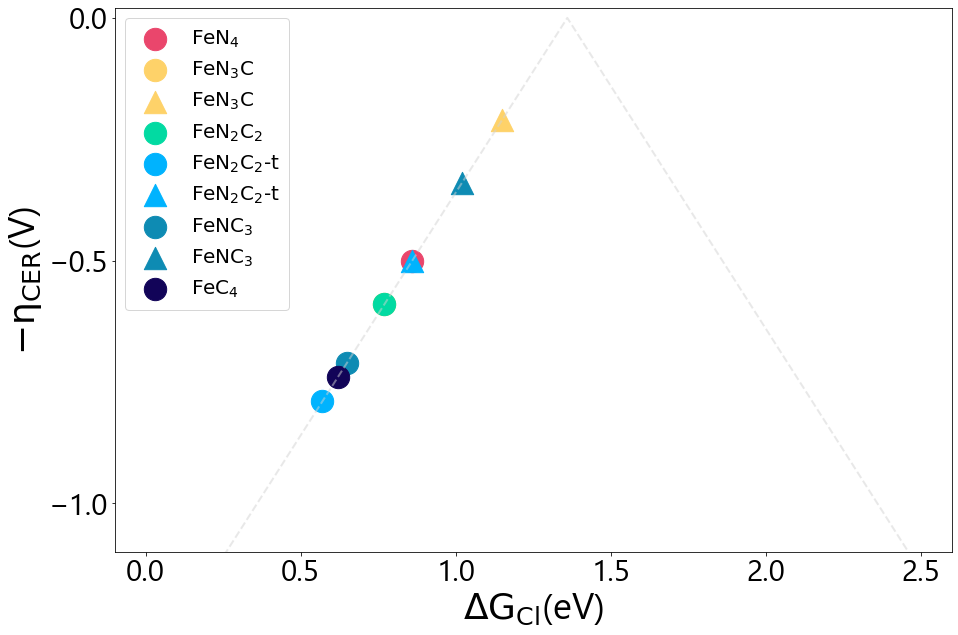

In [304]:
volcano_all('Fe',1)


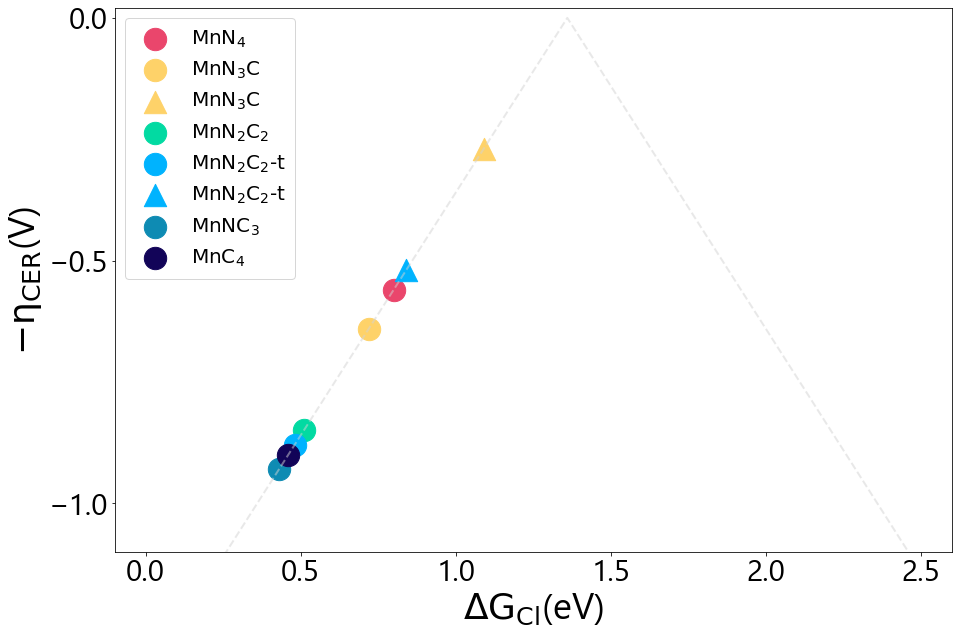

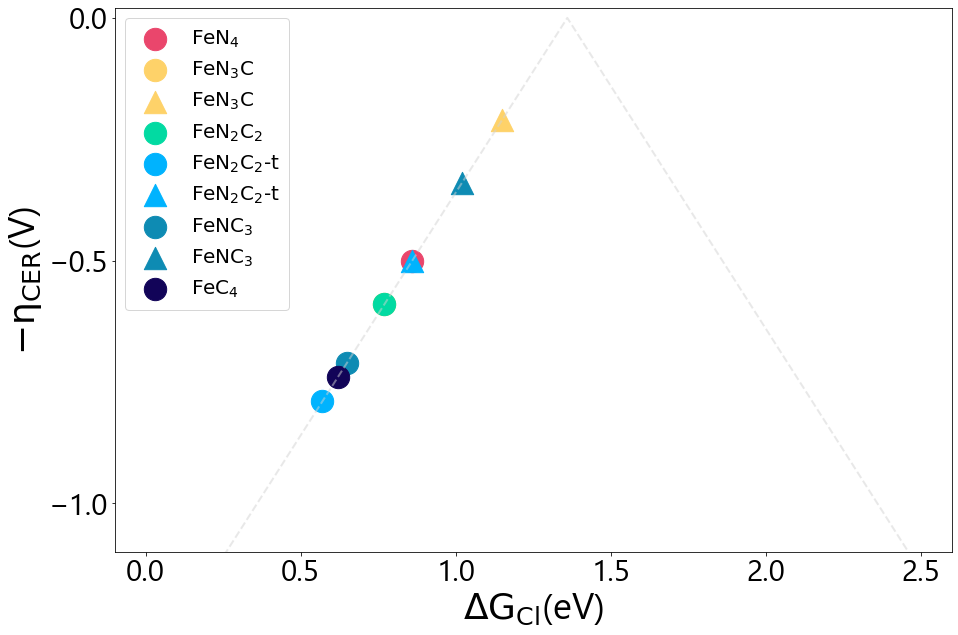

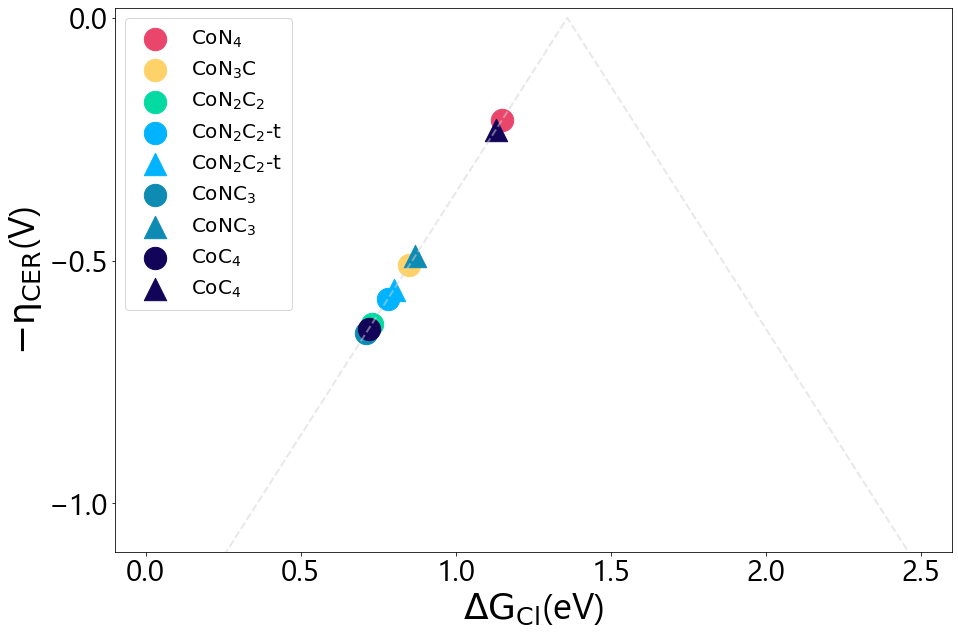

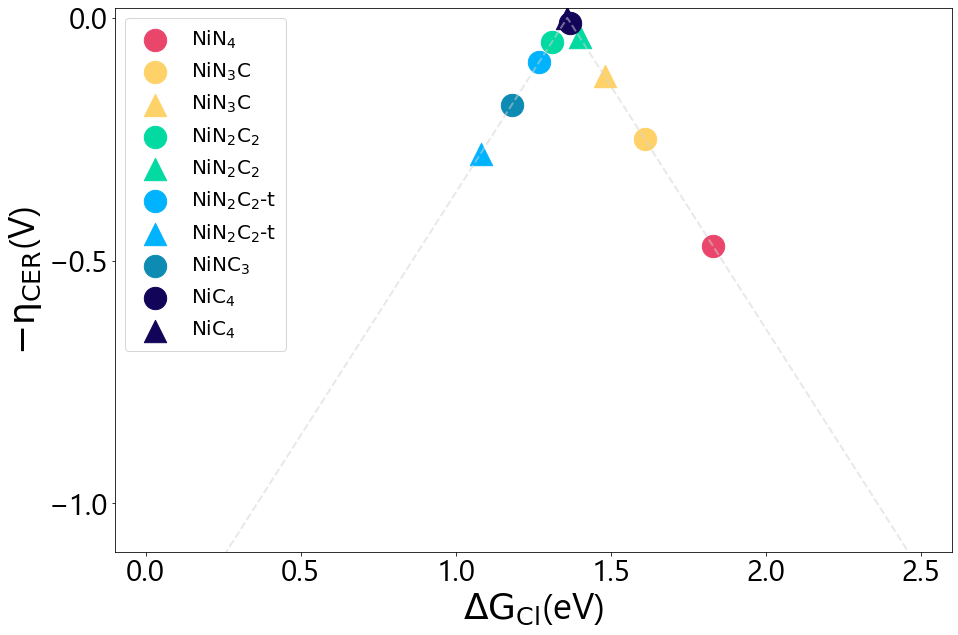

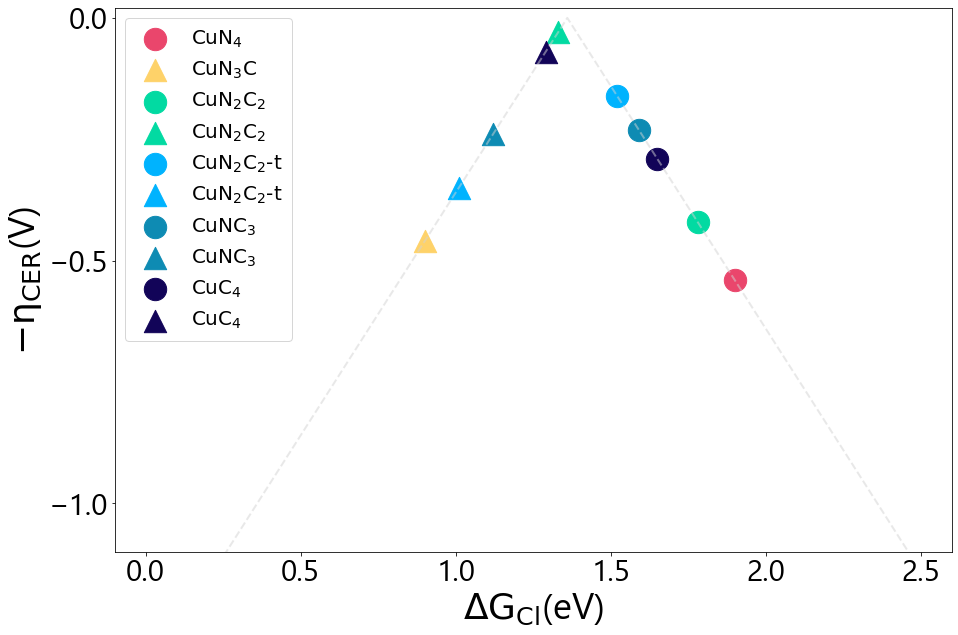

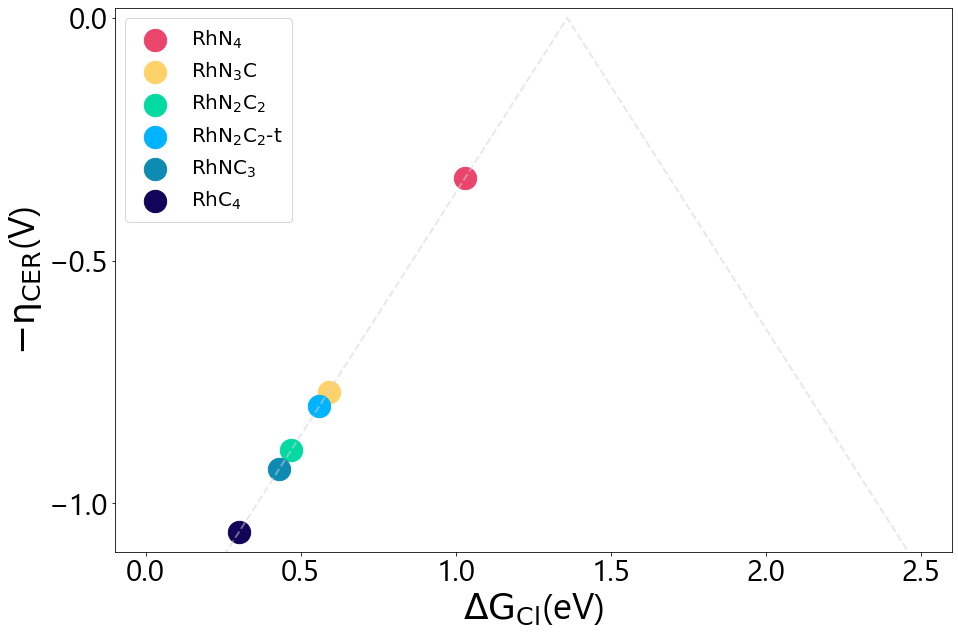

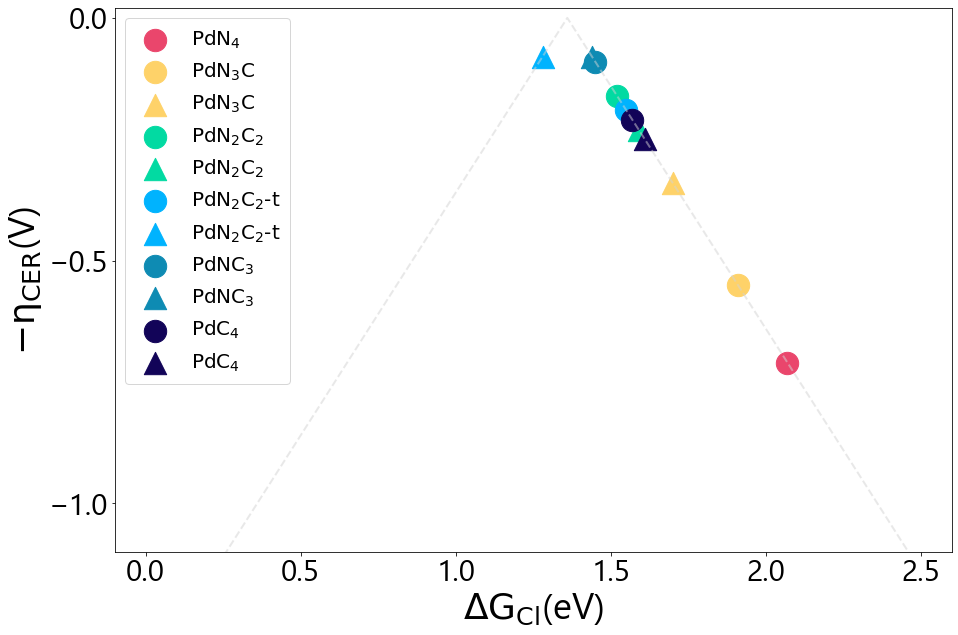

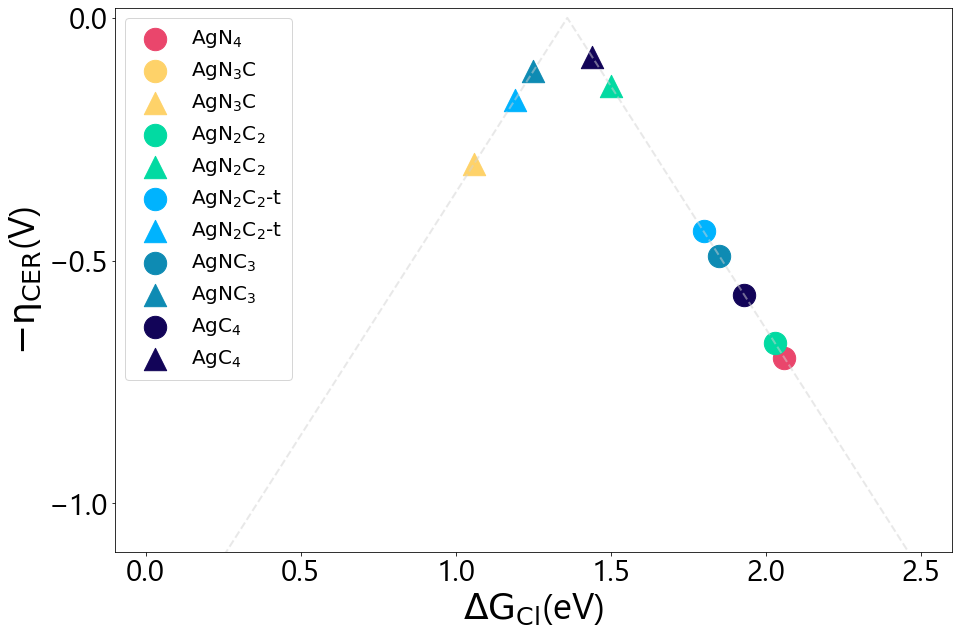

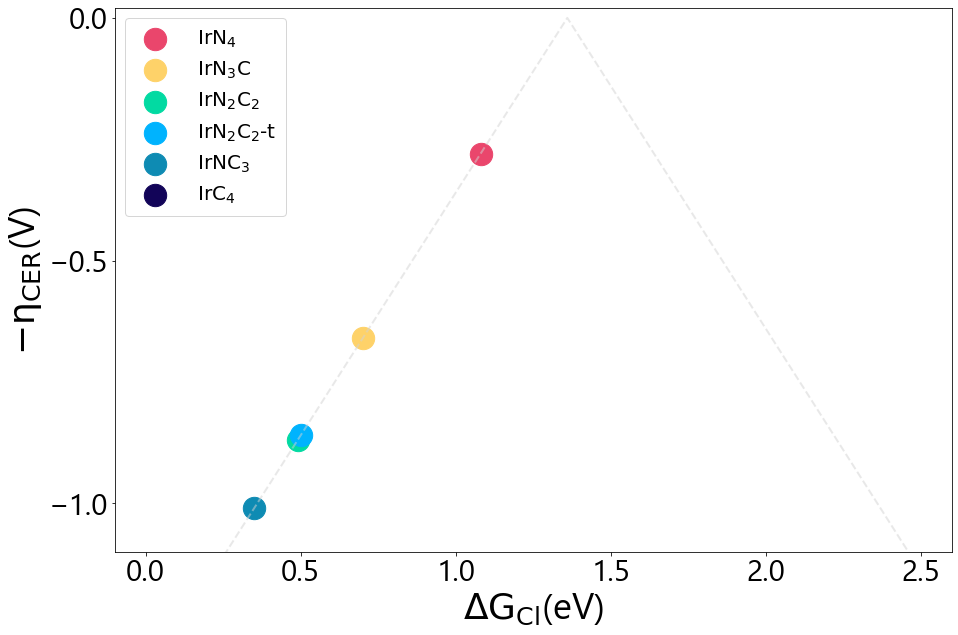

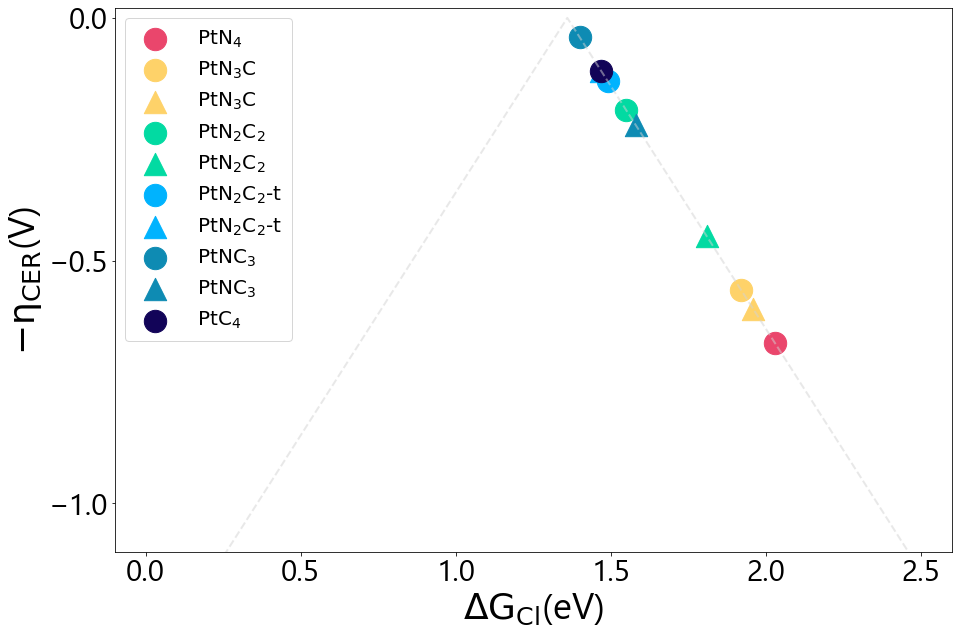

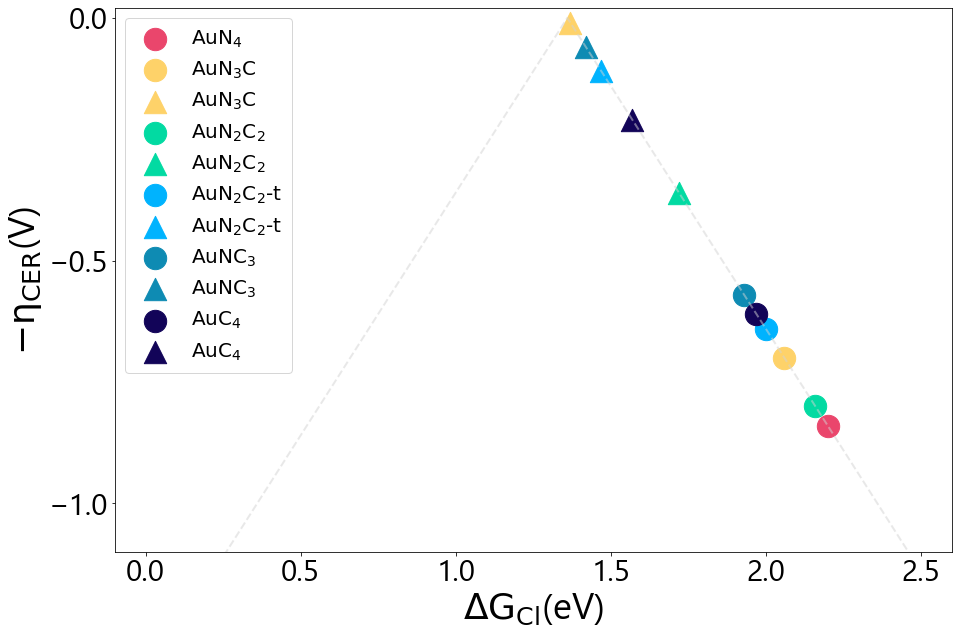

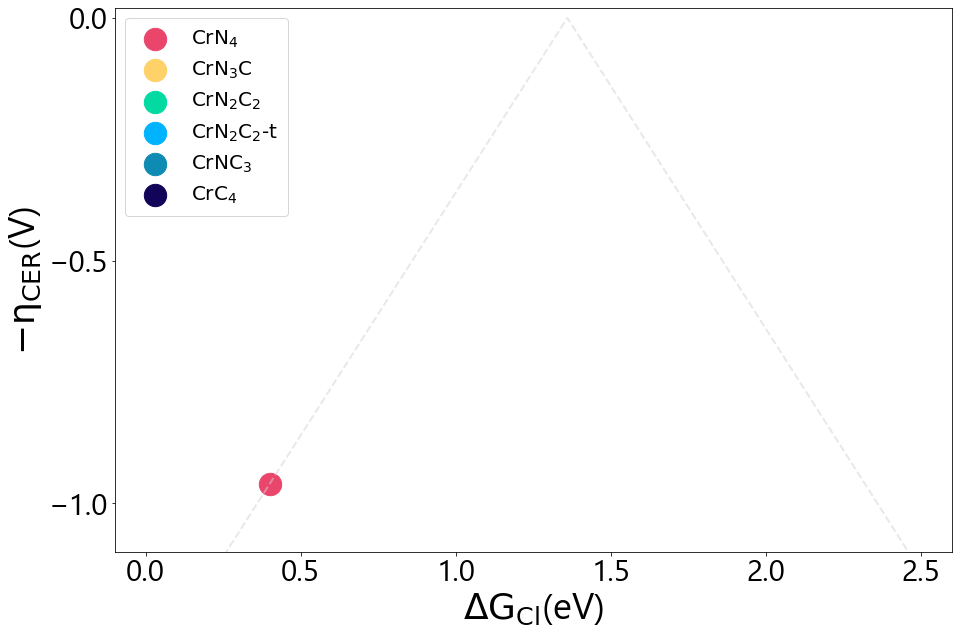

In [305]:
t=0
for i in list(df['M'][:12]) :
    volcano_all(i,t)
    t=t+1

이거 왜 합치면 색깔이 바뀌는지;

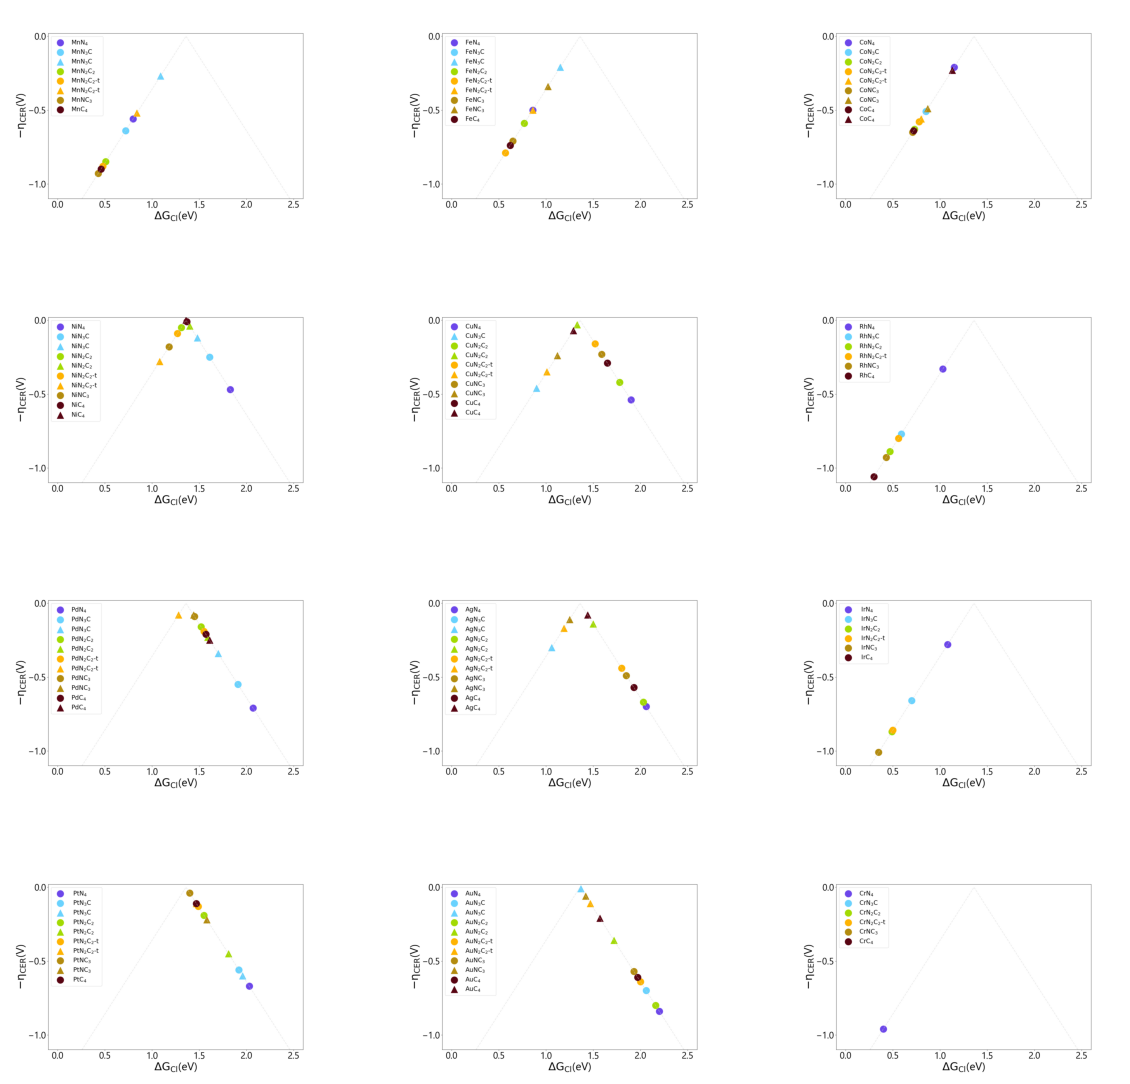

In [306]:
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 20))
k=1
for pp in range(0,12) :
    name=str(pp)
    temp=cv2.imread('/content/'+name+'.png')
    fig.add_subplot(4, 3, k)
    plt.imshow(temp)
    plt.axis('off')
    k=k+1
plt.savefig(str(13),dpi=300)


In [395]:
def volcano_lwr(TM,name) :
    plt.figure(1,figsize=(6,12))
    ax = plt.subplot(111)
    prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=32)
    prop33 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=26)
    prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=40)
    font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()
    x = []
    y = []
    plt.xlim(1.2,2.5)
    plt.ylim(-1,0.1)
    plt.xticks(np.arange(1.5,2.5, 0.5),fontproperties=prop3)
    plt.yticks(np.arange(-1,0.1, 0.5),fontproperties=prop3)
    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 
    
    l = [TM+'N$_4$',TM+'N$_3$C',TM+'N$_2$C$_2$',TM+'N$_2$C$_2$-t',TM+'NC$_3$',TM+'C$_4$']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM, 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM, 'η_CER'])
    site = list(df.loc[df['M']== TM, 'Cl_site'])
    
    j = 0
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='o')
            
        else :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='^')

        if j < 5 :

            ann = ax.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            j = j+1
    
    
    plt.legend(loc='upper right', borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})
    plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
    plt.ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    
    plt.savefig(str(name),dpi=100)
    plt.show()

In [391]:
def volcano_lwl(TM,name) :
    plt.figure(1,figsize=(6,12))
    ax = plt.subplot(111)
    prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=32)
    prop33 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=26)
    prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=40)
    font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()
    x = []
    y = []
    plt.xlim(0.2,1.5)
    plt.ylim(-1,0.1)
    plt.xticks(np.arange(0.5,1.5, 0.5),fontproperties=prop3)
    plt.yticks(np.arange(-1,0.1, 0.5),fontproperties=prop3)
    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,color='gray', linestyle='--',linewidth=2,alpha=0.7) 
    
    l = [TM+'N$_4$',TM+'N$_3$C',TM+'N$_2$C$_2$',TM+'N$_2$C$_2$-t',TM+'NC$_3$',TM+'C$_4$']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM, 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM, 'η_CER'])
    site = list(df.loc[df['M']== TM, 'Cl_site'])
    
    j = 0
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='o')
            
        else :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=500,label=l[i],marker='^')

        if j < 5 :

            ann = ax.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            j = j+1
    
    
    plt.legend(loc='upper left', borderpad=0.5,labelspacing=0.5,prop={'family': font_name,'size':fss})
    plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
    plt.ylabel('$\mathrm{-η_{CER}}$'+'(V)', fontproperties=prop4)    
    plt.savefig(str(name),dpi=100)
    plt.show()

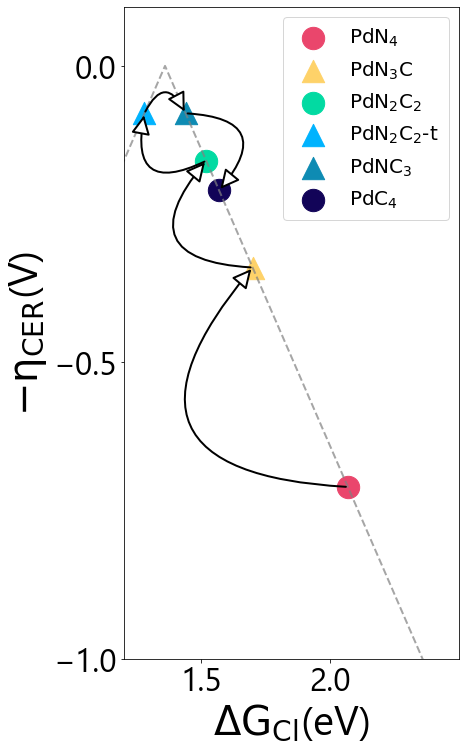

In [396]:
volcano_lwr('Pd','r1')

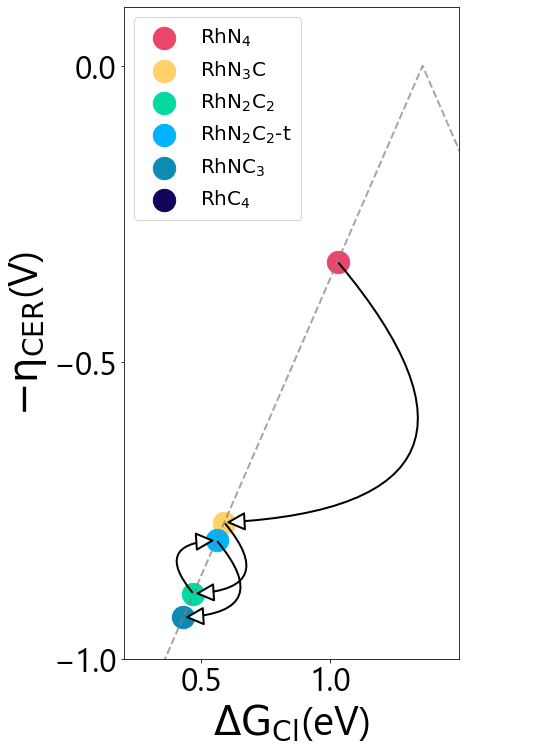

In [386]:
volcano_lwl('Rh','l1')

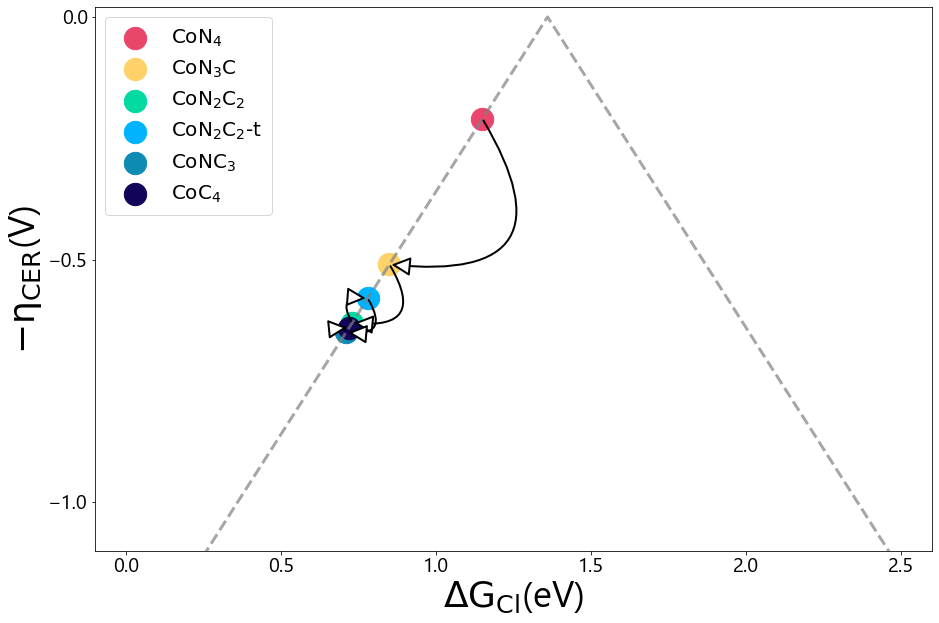

In [356]:
volcano_lw('Co','l2')

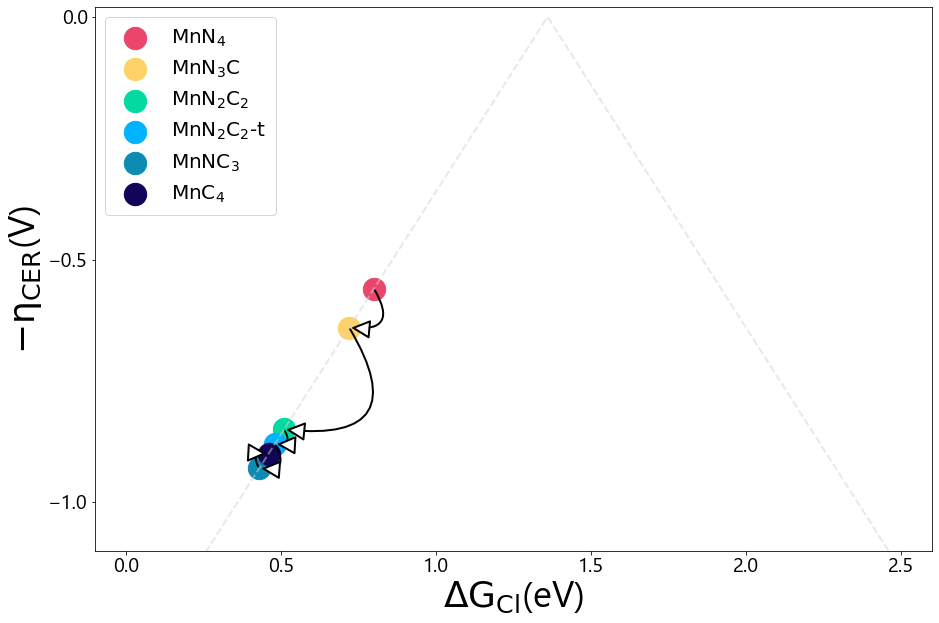

In [350]:
volcano_lw('Mn','l3')

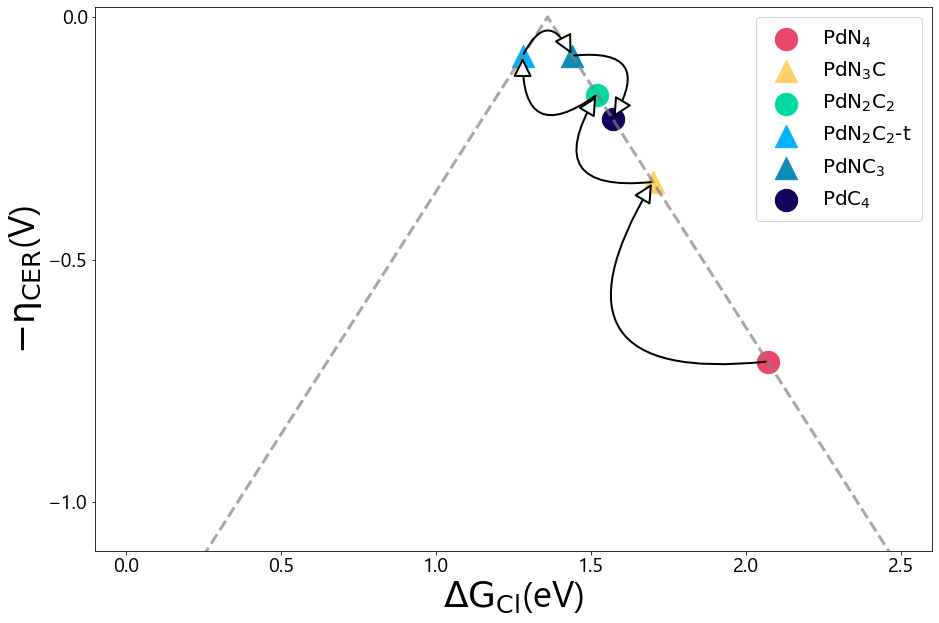

In [360]:
volcano_lw('Pd','r1')

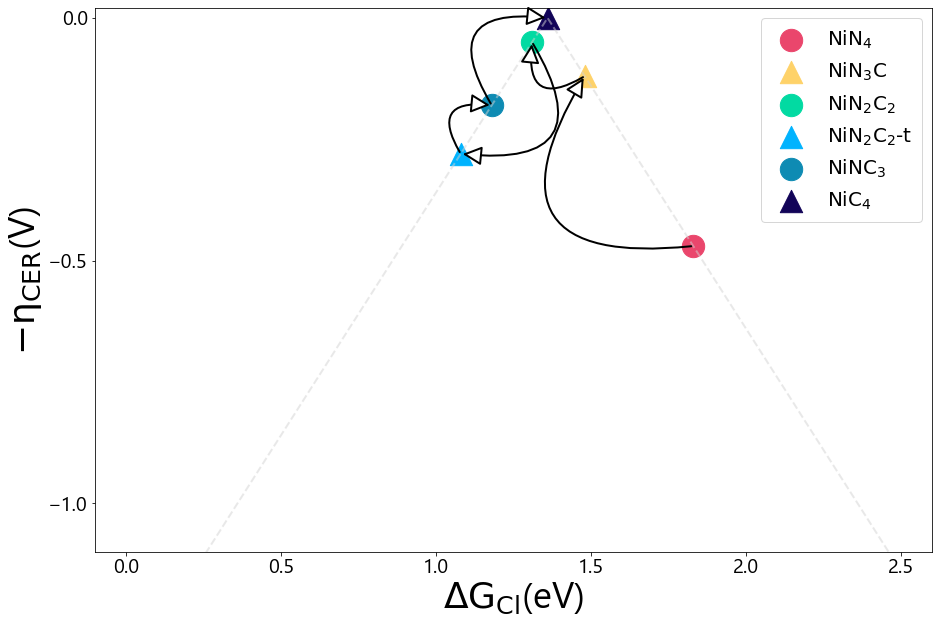

In [343]:
volcano_lw('Ni','r2')

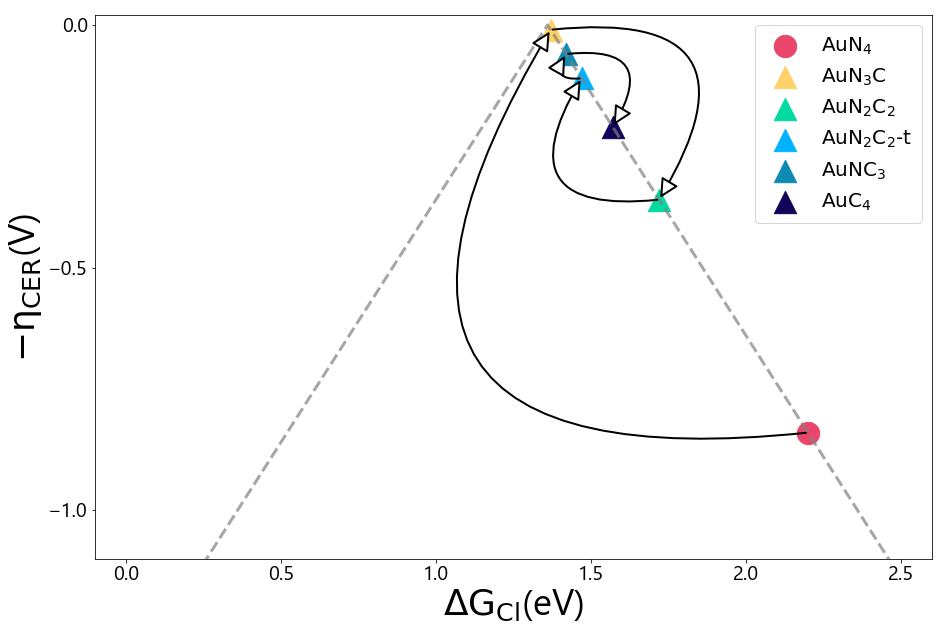

In [361]:
volcano_lw('Au','r3')

In [92]:
isN4 = df2['#of N'] == 4
N4_df = df2[isN4] 
N4_df

,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER,diss,for
0,4,Mn,0.80,0.59,1.64,3.56,0.56,0.69,1.44,-5.26
1,4,Fe,0.86,0.67,1.77,3.48,0.50,0.48,1.72,-4.34
2,4,Co,1.15,1.06,2.77,3.79,0.21,0.48,1.79,-4.14
3,4,Ni,1.83,1.93,4.05,4.51,0.47,0.89,1.84,-4.20
4,4,Cu,1.90,2.03,4.50,4.56,0.54,1.24,2.03,-3.39
5,4,Rh,1.03,1.01,2.78,3.80,0.33,0.54,2.72,-4.24
6,4,Pd,2.07,2.24,4.80,4.65,0.71,1.33,3.11,-4.32
7,4,Ag,2.06,2.41,4.97,4.62,0.70,1.33,3.20,-2.40
8,4,Ir,1.08,1.04,2.41,3.88,0.28,0.24,2.54,-4.13
9,4,Pt,2.03,2.21,4.36,4.68,0.67,0.98,3.54,-4.73


In [11]:
num_N = [4,3,2,'2-t',1,0]
labels = ['MN$_4$','MN$_3$C','MN$_2$C$_2$','MN$_2$C$_2$-t','MNC$_3$','MC$_4$']
sym = ['o','H','s','h','p','D']
#c = ['#ff124f','#ff00a0','#fe75fe','#7a04eb','#00b3fe','#120458']
c= ['#EA466C','#FED269','#02DAA2','#00b3fe','#0E8BB3','#120458']
#ct= ['white','black','white','white','white','white']
ct= ['white','white','white','white','white','white']
s = [300,320,200,320,360,200]

In [14]:
!pip install adjustText
from adjustText import adjust_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=dc3771021ba95ecd9d0502c2e02c0951f2bcb486aea2922803287ebfe4ea215d
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


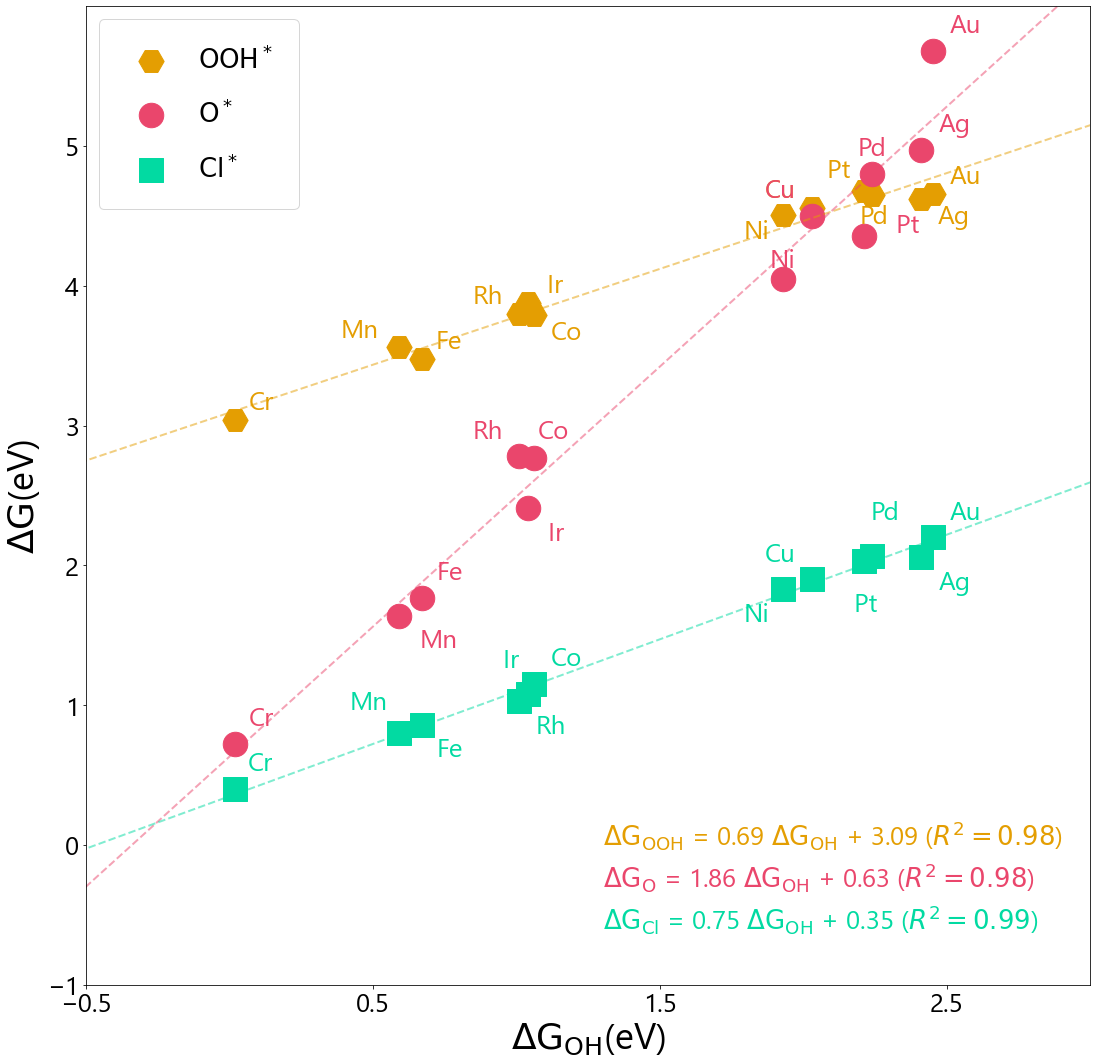

In [216]:
import matplotlib.font_manager as fm

fs=26
fss=12
fsl=36
prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

plt.figure(figsize=(18,18))
############################################## OOH vs O
x_n, y_n = N4_df['G_OH'],N4_df['G_OOH']
plt.scatter(x_n, y_n,label = 'OOH$^*$',color='#E49E02' ,s=s[1],marker=sym[1])
res2 = stats.linregress(x_n, y_n)
x_fit = np.arange(-1,6,0.01)
y_fit = res2.intercept + res2.slope* x_fit
plt.plot(x_fit,y_fit,'--' ,linewidth=2 ,color='#E49E02',alpha=0.5)
TEXTS=[]
for j in range(0, len(N4_df['M'])) :  
  TEXTS.append(plt.text(N4_df['G_OH'][j],N4_df['G_OOH'][j],N4_df['M'][j],color='#E49E02', fontproperties=prop3))

adjust_text(TEXTS,expand_points=(1.5,1.5))    
############################################## OH vs O
x_n, y_n = N4_df['G_OH'],N4_df['G_O']
plt.scatter(x_n, y_n,label = 'O$^*$' ,color=c[0] ,s=s[0],marker=sym[0])
res = stats.linregress(x_n, y_n)
x_fit = np.arange(-1,6,0.01)
y_fit = res.intercept + res.slope* x_fit
plt.plot(x_fit,y_fit,'--' ,linewidth=2 ,color=c[0],alpha=0.5)
TEXTS=[]
for j in range(0, len(N4_df['M'])) :  
  TEXTS.append(plt.text(N4_df['G_OH'][j],N4_df['G_O'][j],N4_df['M'][j],color=c[0], fontproperties=prop3))

adjust_text(TEXTS,expand_points=(1.5,1.5))    
############################################## Cl vs O
x_n, y_n = N4_df['G_OH'],N4_df['G_Cl']
plt.scatter(x_n, y_n,label = 'Cl$^*$',color=c[2] ,s=s[2],marker=sym[2])
res3 = stats.linregress(x_n, y_n)
x_fit = np.arange(-1,6,0.01)
y_fit = res3.intercept + res3.slope* x_fit
plt.plot(x_fit,y_fit,'--' ,linewidth=2 ,color=c[2],alpha=0.5)
TEXTS=[]
for j in range(0, len(N4_df['M'])) :  
  TEXTS.append(plt.text(N4_df['G_OH'][j],N4_df['G_Cl'][j],N4_df['M'][j],color=c[2], fontproperties=prop3))

adjust_text(TEXTS,expand_points=(1.5,1.5))    
############################################## Plot
plt.xlim(-.5,3)
plt.ylim(-1,6)
plt.xticks(np.arange(-0.5,3, 1),fontproperties=prop3)
plt.yticks(np.arange(-1,6, 1),fontproperties=prop3)
plt.legend(loc='upper left', borderpad=1,labelspacing=1.0,prop={'family': font_name,'size':fs})
plt.xlabel('$\mathrm{ΔG_{OH}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{ΔG}$'+'(eV)', fontproperties=prop4)

plt.text( 1.3,0 ,'$\mathrm{ΔG_{OOH}}$ = %.2f $\mathrm{ΔG_{OH}}$ + %.2f ($R^2 = %.2f$)' %(res2.slope, res2.intercept,res2.rvalue**2),fontproperties=prop3,color='#E49E02')
plt.text( 1.3,-0.3 ,'$\mathrm{ΔG_{O}}$ = %.2f $\mathrm{ΔG_{OH}}$ + %.2f ($R^2 = %.2f$)' %(res.slope, res.intercept,res.rvalue**2),fontproperties=prop3,color=c[0])
plt.text( 1.3,-0.6 ,'$\mathrm{ΔG_{Cl}}$ = %.2f $\mathrm{ΔG_{OH}}$ + %.2f ($R^2 = %.2f$)' %(res3.slope, res3.intercept,res3.rvalue**2),fontproperties=prop3,color=c[2])
plt.savefig("oer.png", dpi=150)



findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


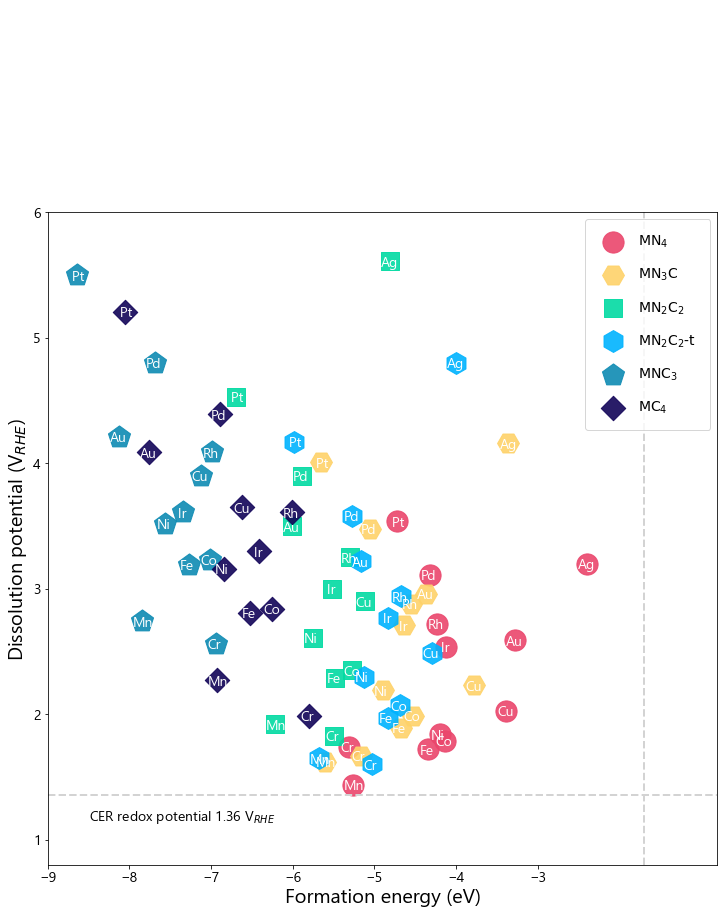

In [13]:
import matplotlib.font_manager as fm
prop1 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=14)
prop2 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=20)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 1.5 for element in s]
plt.figure(figsize=(12,12))
start=0

for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    plt.scatter(temp_df['for'],temp_df['diss'],s=s2[i], color=c[i], marker= sym[i], alpha=0.9,label=labels[i])
    for j in range(start, len(temp_df['M'])+start) :
      plt.text(temp_df['for'][j]-0.11,temp_df['diss'][j]-0.04,temp_df['M'][j],fontsize = 10,color=ct[i], fontproperties=prop1)
      start=start+1
plt.legend(loc='upper right', borderpad=1,labelspacing=1.2,prop={'family': font_name,'size':14})
plt.xticks(np.arange(-9,-2, 1),fontproperties=prop1)
plt.yticks(np.arange(0,7, 1),fontproperties=prop1)
plt.xlim(-9,-0.8)
plt.ylim(0.8,6)
plt.axhline(1.36, 0, 1, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(-1.7, 0, 1, color='lightgray', linestyle='--', linewidth=2)
plt.text(-8.5,1.15,'CER redox potential 1.36 V$_{RHE}$',fontproperties=prop1)
plt.xlabel('Formation energy (eV)', fontproperties=prop2)
plt.ylabel('Dissolution potential (V$_{RHE}$)', fontproperties=prop2)
plt.savefig("stability.png", dpi=150)


#best_detact

In [17]:
temp=[]
temp2=[]
minlist=[]  #min value들을 담는 리스트
min_glist=[]
mx=[]       #N이 몇일때 젤 낮은지 detact
for j in range(0,12):
  for i in range(0,len(num_N)) :
    temp.append(df2['η_CER'][j+12*i])
    temp2.append(df2['G_Cl'][j+12*i])
  print(temp)
  midx, mval = min(enumerate(x if x is not None else float('inf') for x in temp), key=lambda i: i[1])
  min_glist.append(temp2[midx])
  minlist.append(mval)
  mx.append(midx)
  temp=[]
  temp2=[]
mlist=[]
for i in range(0,12):
  mlist.append(df2['M'][i])


[0.56, 0.6400000000000001, 0.8500000000000001, 0.8800000000000001, 0.9300000000000002, 0.9000000000000001]
[0.5000000000000001, 0.5900000000000001, 0.5900000000000001, 0.7900000000000001, 0.7100000000000001, 0.7400000000000001]
[0.2100000000000002, 0.5100000000000001, 0.6300000000000001, 0.5800000000000001, 0.6500000000000001, 0.6400000000000001]
[0.47, 0.11999999999999988, 0.050000000000000044, 0.28, 0.18000000000000016, 0.0]
[0.5399999999999998, 0.4600000000000001, 0.030000000000000027, 0.3500000000000001, 0.24, 0.07000000000000006]
[0.33000000000000007, 0.7700000000000001, 0.8900000000000001, 0.8, 0.9300000000000002, 1.06]
[0.7099999999999997, 0.33999999999999986, 0.15999999999999992, 0.08000000000000007, 0.07999999999999985, 0.20999999999999996]
[0.7, 0.30000000000000004, 0.1399999999999999, 0.17000000000000015, 0.1100000000000001, 0.07999999999999985]
[0.28, 0.6600000000000001, 0.8700000000000001, 0.8600000000000001, 1.0100000000000002, 1.36]
[0.6699999999999997, 0.559999999999999

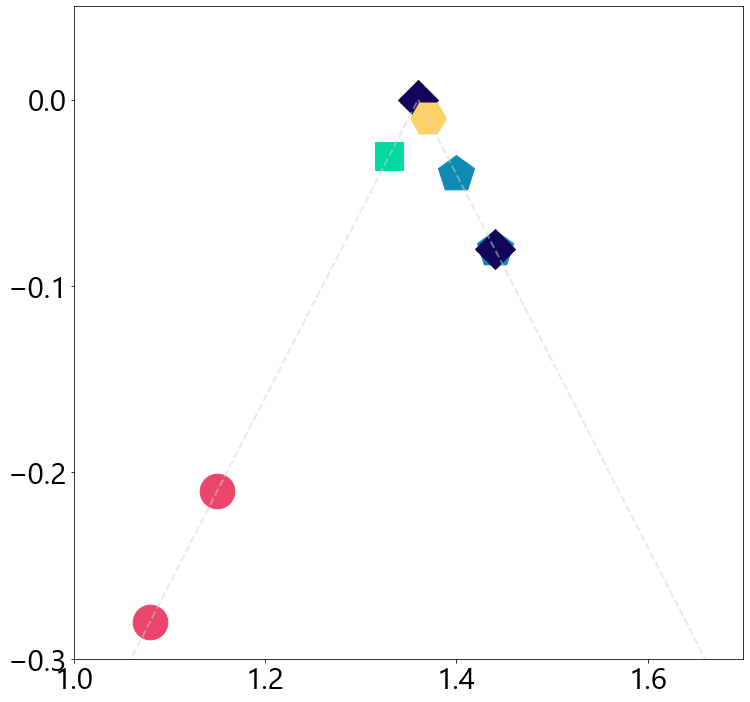

In [23]:
prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=30)
s2 = [element * 4 for element in s]

plt.figure(figsize=(12,12))


for j in range(0,12):
  i=mx[j]
  plt.scatter(min_glist[j],-minlist[j],s=s2[i], color=c[i],marker= sym[i], alpha=1)
#  plt.text(min_glist[j]-0.014,-minlist[j]-0.003,mlist[j],color='white', fontproperties=prop3)
x_ul=1.7
x_ll=1.0
y_ul=0.05
y_ll=-0.3
plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
plt.xlim(x_ll,x_ul)
plt.ylim(y_ll,y_ul)
plt.xticks(np.arange(x_ll,x_ul, 0.2),fontproperties=prop3)
plt.yticks(np.arange(y_ll,y_ul, 0.1),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)

plt.savefig("best.png", dpi=150)

(array([-0.2, -0.1,  0. ]), <a list of 3 Text major ticklabel objects>)

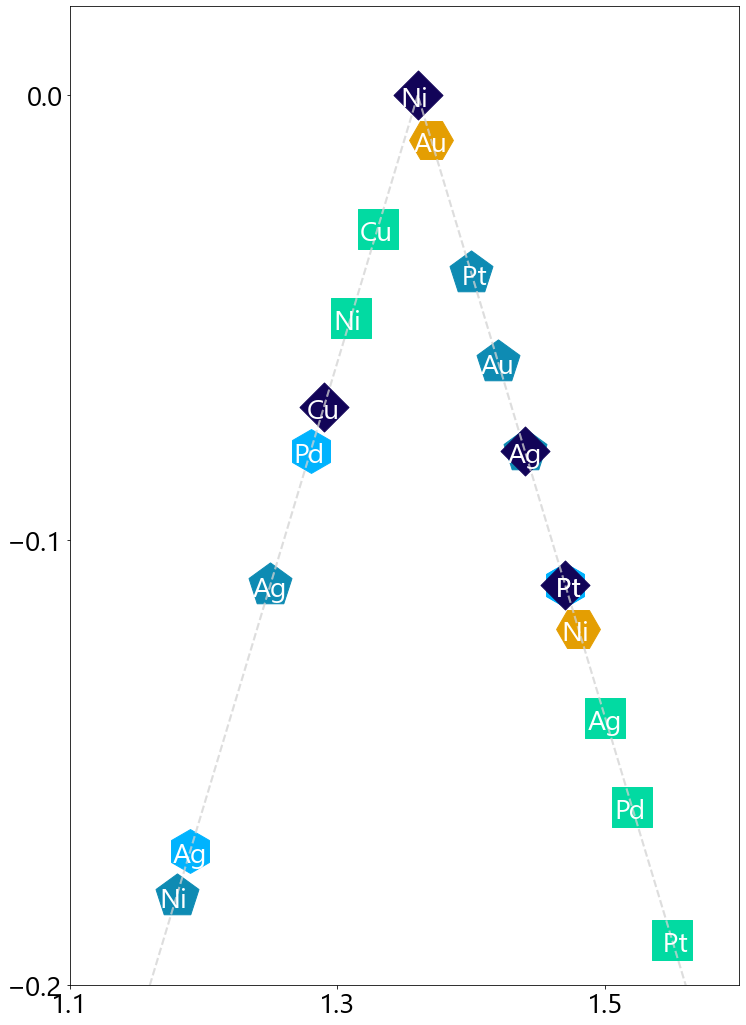

In [183]:
def drop(frame, M,N,num_N) :
    #print(M,N,num_N)
    if str(num_N) == str(N) :
        #print('true')
        
        index_drop = frame.index[frame['M'] == M].tolist()[0]
        #print(index_drop)
        frame = frame.drop(index=index_drop)
        
        
    return frame
cs= ['#EA466C','#E49E02','#02DAA2','#00b3fe','#0E8BB3','#120458']
labelss = ['N$_4$','N$_3$C','N$_2$C$_2$','N$_2$C$_2$-t','NC$_3$','C$_4$']

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=28)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 3 for element in s]
plt.figure(figsize=(12,18))
fs=20
fsl=28

start = 0
textt=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    temp_df = df2[is_N]
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=s2[i], color=cs[i],
                marker= sym[i], alpha=1,
                label=labels[i])
   
    temp_df=temp_df.reset_index(drop=True)
    ## label 제거하기
    
    temp_df = drop(temp_df,'Pd','0',str(num_N[i]) )  
    temp_df = drop(temp_df,'Ni','2-t',str(num_N[i]) )
    temp_df = drop(temp_df,'Au','2-t',str(num_N[i]) )  
    temp_df = drop(temp_df,'Pd','1',str(num_N[i]) )  
    temp_df=temp_df.reset_index(drop=True)

    ##    
    for j in range(len(temp_df['M'])) :
        if -temp_df['η_CER'][j] >= -0.20 :
            plt.text(temp_df['G_Cl'][j]-0.013,-temp_df['η_CER'][j]-0.0025,temp_df['M'][j],color='w', fontproperties=prop3)

plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
x_ul=1.6
x_ll=1.1
y_ul=0.02
y_ll=-0.2
plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
plt.xlim(x_ll,x_ul)
plt.ylim(y_ll,y_ul)
plt.xticks(np.arange(x_ll,x_ul, 0.2),fontproperties=prop3)
plt.yticks(np.arange(y_ll,y_ul, 0.1),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)

plt.savefig("toptop.png", dpi=150)

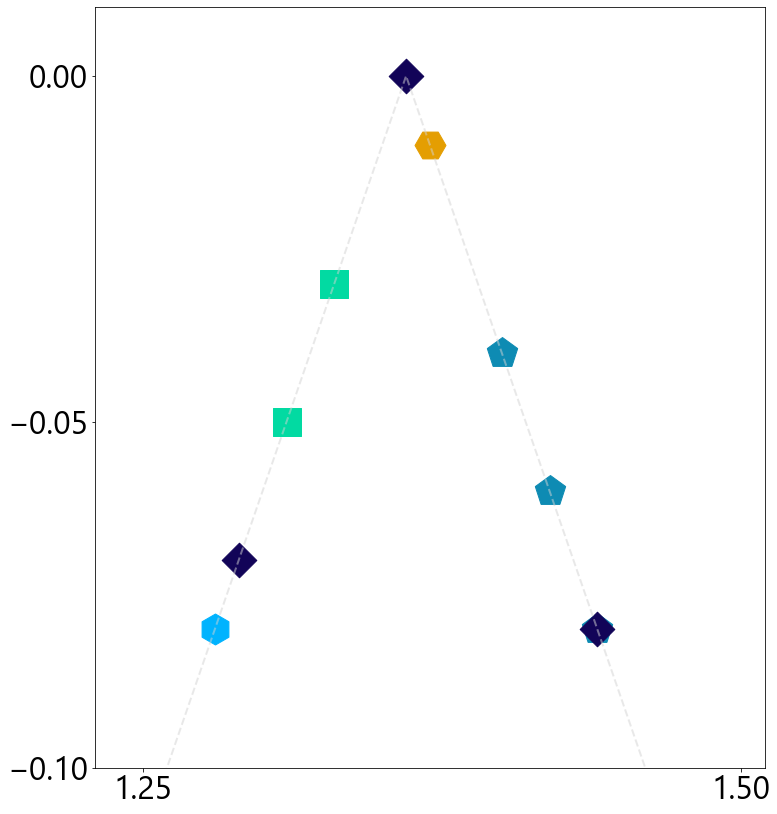

In [215]:

cs= ['#EA466C','#E49E02','#02DAA2','#00b3fe','#0E8BB3','#120458']
labelss = ['N$_4$','N$_3$C','N$_2$C$_2$','N$_2$C$_2$-t','NC$_3$','C$_4$']

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=32)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 1.5 for element in s]
plt.figure(figsize=(12,14))
fs=20
fsl=28

start = 0
textt=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    temp_df = df2[is_N]
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=s2[i], color=cs[i],
                marker= sym[i], alpha=1,
                label=labels[i])
   
    temp_df=temp_df.reset_index(drop=True)


plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
x_ul=1.51
x_ll=1.23
y_ul=0.01
y_ll=-0.1
plt.xlim(x_ll,x_ul)
plt.ylim(y_ll,y_ul)
plt.xticks(np.arange(1.25,1.51, 0.25),fontproperties=prop3)
plt.yticks(np.arange(-0.1,0.01, 0.05),fontproperties=prop3)

plt.savefig("toptop.png", dpi=150)

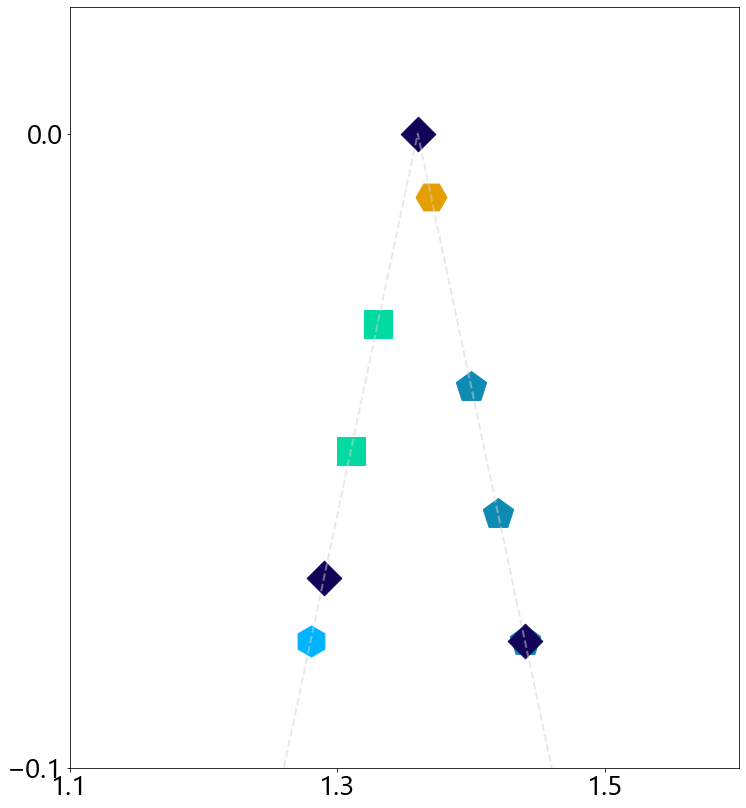

In [189]:

cs= ['#EA466C','#E49E02','#02DAA2','#00b3fe','#0E8BB3','#120458']
labelss = ['N$_4$','N$_3$C','N$_2$C$_2$','N$_2$C$_2$-t','NC$_3$','C$_4$']

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=28)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 1.5 for element in s]
plt.figure(figsize=(12,14))
fs=20
fsl=28

start = 0
textt=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    temp_df = df2[is_N]
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=s2[i], color=cs[i],
                marker= sym[i], alpha=1,
                label=labels[i])
   
    temp_df=temp_df.reset_index(drop=True)


plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
x_ul=1.
x_ll=1.2
y_ul=0.02
y_ll=-0.1
plt.xlim(x_ll,x_ul)
plt.ylim(y_ll,y_ul)
plt.xticks(np.arange(x_ll,x_ul, 0.2),fontproperties=prop3)
plt.yticks(np.arange(y_ll,y_ul, 0.1),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)

plt.savefig("toptop3.png", dpi=150)

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.


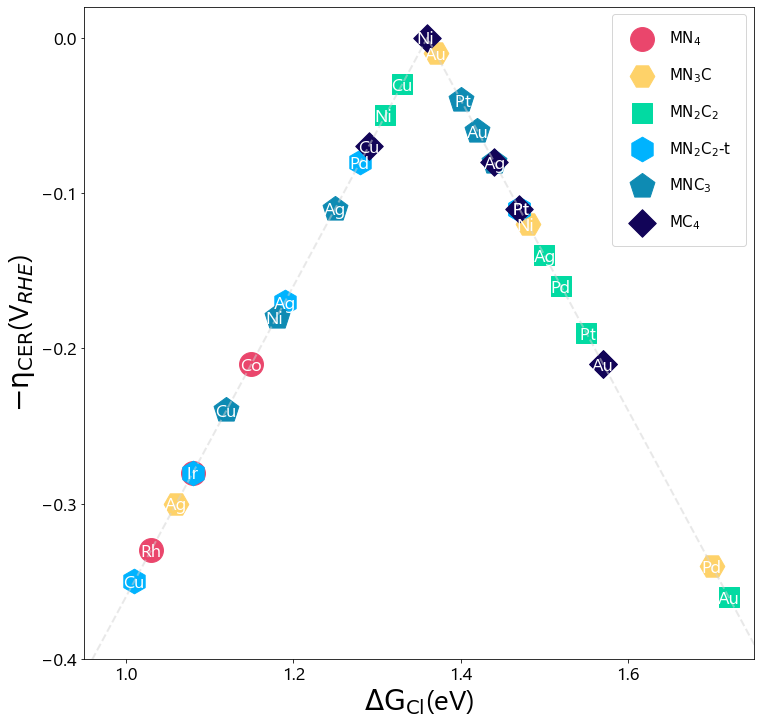

In [24]:
def drop(frame, M,N,num_N) :
    #print(M,N,num_N)
    if str(num_N) == str(N) :
        #print('true')
        
        index_drop = frame.index[frame['M'] == M].tolist()[0]
        #print(index_drop)
        frame = frame.drop(index=index_drop)
        
        
    return frame

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=18)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=28)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 1.9 for element in s]
plt.figure(figsize=(12,12))
fs=20
fsl=28

start = 0
TEXTS=[] 
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    temp_df = df2[is_N]
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=s2[i], color=c[i],
                marker= sym[i], alpha=1,
                label=labels[i])
    
    
    ## label 제거하기
    
    temp_df = drop(temp_df,'Pd','0',str(num_N[i]) )  
    temp_df = drop(temp_df,'Ni','2-t',str(num_N[i]) )
    temp_df = drop(temp_df,'Au','2-t',str(num_N[i]) )  
    temp_df = drop(temp_df,'Pd','1',str(num_N[i]) )  

    ##
    
    temp_df=temp_df.reset_index(drop=True)
    
    for j in range(len(temp_df['M'])) :
        #print(temp_df['η_CER'][j])
        if -temp_df['η_CER'][j] >= -0.40 :
            plt.text(temp_df['G_Cl'][j]-0.013,-temp_df['η_CER'][j]-0.004,temp_df['M'][j],color='white', fontproperties=prop3)


plt.plot(x,-y,color='lightgray', linestyle='--',linewidth=2,alpha=0.5)
plt.legend(loc='upper right', borderpad=1,labelspacing=1.2,prop={'family': font_name,'size':15})
plt.xlim(0.95,1.75)
plt.ylim(-0.4,0.02)
plt.xticks(np.arange(1,1.8, 0.2),fontproperties=prop3)
plt.yticks(np.arange(-0.4,0.1, 0.1),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)
plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{-η_{CER}}$'+'(V$_{RHE}$)', fontproperties=prop4)
plt.savefig("all.png", dpi=150)


#CER N4

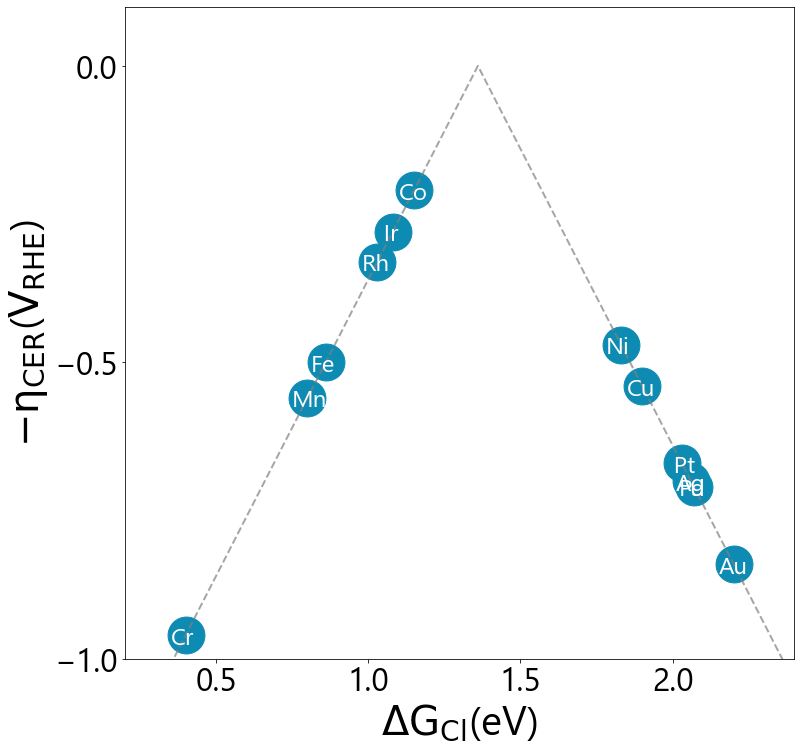

In [152]:

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=32)
prop33 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=24)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=40)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 2 for element in s]
plt.figure(figsize=(12,12))
fs=20
fsl=28

start = 0
TEXTS=[] 
k=4
plt.scatter(N4_df['G_Cl'],-N4_df['η_CER'],s=s2[k], color=c[k], marker= sym[0], alpha=1,label=labels[i])
for j in range(len(N4_df['M'])) :
    plt.text(N4_df['G_Cl'][j]-0.05,-N4_df['η_CER'][j]-0.015,N4_df['M'][j],color='w', fontproperties=prop33)
    
plt.plot(x,-y,color='gray', linestyle='--',linewidth=2,alpha=0.7)
plt.xlim(0.2,2.4)
plt.ylim(-1,0.1)
plt.xticks(np.arange(0.5,2.5, 0.5),fontproperties=prop3)
plt.yticks(np.arange(-1,0.1, 0.5),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)
plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{-η_{CER}}$'+'($\mathrm{V_{RHE}}$)', fontproperties=prop4)
plt.savefig("cer_n4.png", dpi=150)


#OER N4

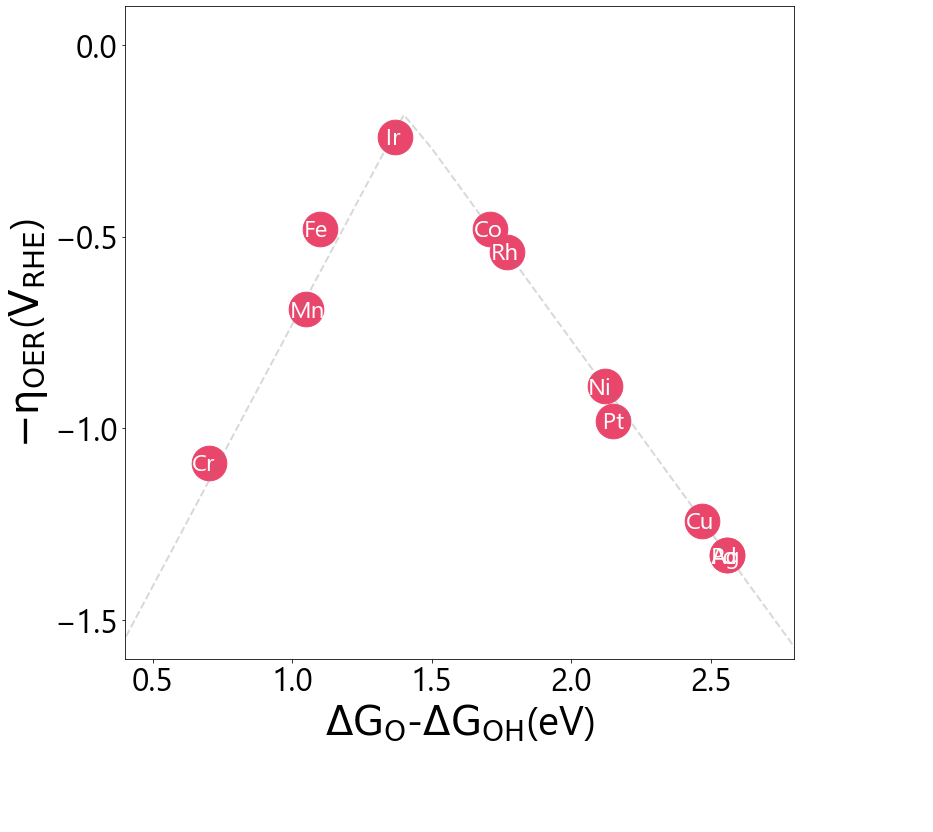

In [165]:

prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=32)
prop33 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=24)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=40)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 2 for element in s]
plt.figure(figsize=(12,12))
fs=20
fsl=28

start = 0
TEXTS=[] 
k=0
plt.scatter(N4_df['G_O']-N4_df['G_OH'],-N4_df['η_OER'],s=s2[k], color=c[k], marker= sym[0], alpha=1,label=labels[i])
for j in range(len(N4_df['M'])) :
    plt.text(N4_df['G_O'][j]-N4_df['G_OH'][j]-0.06,-N4_df['η_OER'][j]-0.02,N4_df['M'][j],color='w', fontproperties=prop33)

x_fit = np.arange(-.2,4,0.1)
y_OER_fit1 =  (-1.365*x_fit +0.864+2.460) - 1.23
#y_OER_fit1 = (2.63 - x_fit-1.23)
y_OER_fit2 = x_fit-1.23

η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
    # plot lines

plt.plot(x_fit , -η_OER_fit,'--', color='gray',alpha=0.3, linestyle='--',linewidth=2)
plt.xlim(0.4,2.8)
plt.ylim(-1.6,0.1)
plt.xticks(np.arange(0.5,3.0, 0.5),fontproperties=prop3)
plt.yticks(np.arange(-1.5,0.1, 0.5),fontproperties=prop3)

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)
plt.xlabel('$\mathrm{ΔG_{O}}$-$\mathrm{ΔG_{OH}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{-η_{OER}}$'+'($\mathrm{V_{RHE}}$)', fontproperties=prop4)
plt.savefig("oer_n4.png", dpi=150)

#CER over

[[0.56, 0.5, 0.21, 0.47, 0.54, 0.33, 0.71, 0.7, 0.28, 0.67, 0.84, 0.96], [0.64, 0.59, 0.51, 0.12, 0.46, 0.77, 0.34, 0.3, 0.66, 0.56, 0.01, 1.17], [0.85, 0.59, 0.63, 0.05, 0.03, 0.89, 0.16, 0.14, 0.87, 0.19, 0.36, 1.35], [0.88, 0.79, 0.58, 0.28, 0.35, 0.8, 0.08, 0.17, 0.86, 0.11, 0.11, 1.5], [0.93, 0.71, 0.65, 0.18, 0.24, 0.93, 0.08, 0.11, 1.01, 0.04, 0.06, 1.62], [0.9, 0.74, 0.64, 0.0, 0.07, 1.06, 0.21, 0.08, 1.36, 0.11, 0.21, 1.92]]


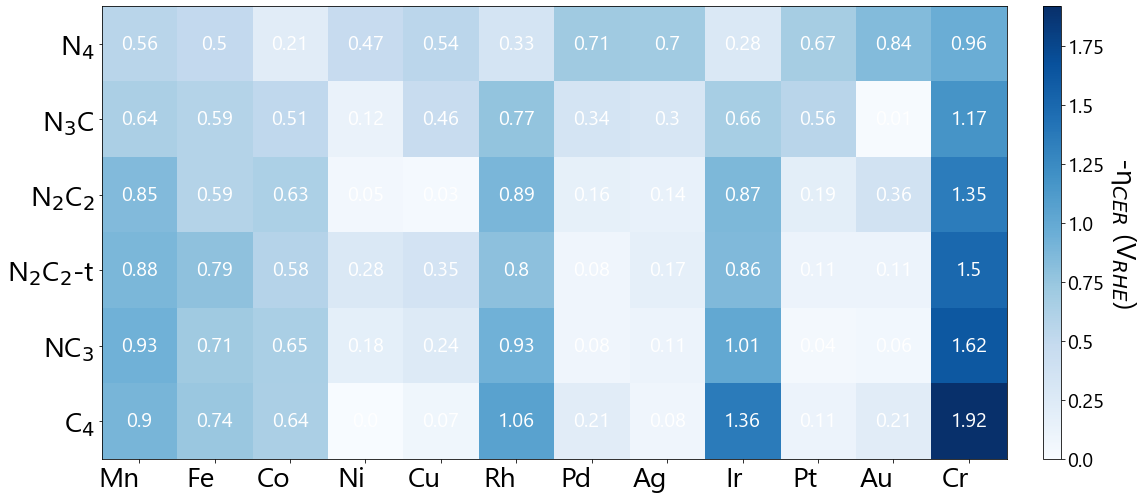

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,12)
prop5 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop6 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)

vegetables = ['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Rh', 'Pd', 'Ag', 'Ir', 'Pt', 'Au', 'Cr']
support = ["N$_{4}$", "N$_{3}$C","N$_{2}$C$_{2}$","N$_{2}$C$_{2}$-t","NC$_{3}$", "C$_{4}$"]

start=0
harvest=[]
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    temp=[]
    for j in range(start, len(temp_df['M'])+start) :
      temp.append(round(temp_df['η_CER'][j],2))
      start=start+1
    harvest.append(temp)
print(harvest)
harvest =np.array(harvest)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.cm.Blues)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.5)
hi=plt.colorbar(im, cax=cax)
hi.ax.set_ylabel('-η$_{CER}$ (V$_{RHE}$)', rotation=-90, va="bottom", fontproperties=prop6)
hi.ax.set_yticklabels(np.arange(0,2, 0.25),fontproperties=prop5)
plot_conf = {'ha': 'center'}
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(vegetables)))
ax.set_yticks(np.arange(len(support)))
ax.set_yticklabels(support, fontproperties=prop6)
ax.set_xticklabels(vegetables, fontproperties=prop6,**plot_conf)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(support)):
    for j in range(len(vegetables)):
        text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="w", fontproperties=prop5) 

fig.tight_layout()
#plt.savefig("act.png", dpi=150)

#OER

[[0.69, 0.48, 0.48, 0.89, 1.24, 0.54, 1.33, 1.33, 0.24, 0.98, 2.0, 1.09], [1.73, 1.6, 1.52, 1.32, 1.26, 1.28, 1.11, 0.73, 1.11, 1.01, 0.44, 1.37], [1.61, 1.66, 1.49, 1.35, 0.95, 1.3, 1.12, 0.52, 0.99, 0.99, 0.46, 1.64], [1.91, 1.9, 1.84, 1.59, 1.46, 1.85, 1.51, 1.05, 1.37, 1.35, 0.8, 1.46], [1.93, 1.93, 1.89, 1.89, 1.3, 1.78, 1.83, 1.13, 1.26, 1.63, 0.88, 1.68], [1.9, 1.89, 1.9, 2.36, 1.25, 1.73, 1.66, 1.04, 1.15, 1.51, 0.76, 1.78]]


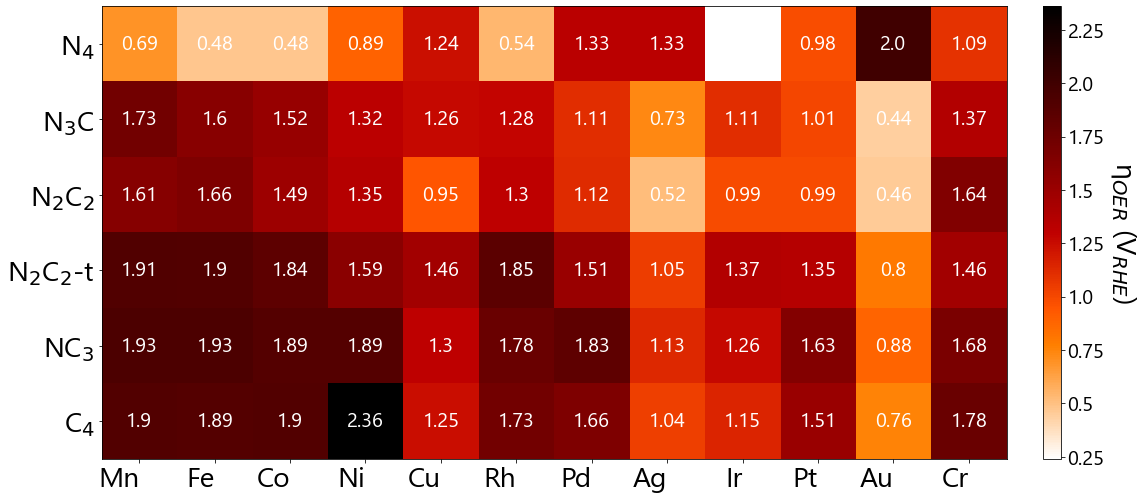

In [78]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,12)
prop5 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop6 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)

vegetables = ['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Rh', 'Pd', 'Ag', 'Ir', 'Pt', 'Au', 'Cr']
support = ["N$_{4}$", "N$_{3}$C","N$_{2}$C$_{2}$","N$_{2}$C$_{2}$-t","NC$_{3}$", "C$_{4}$"]

start=0
harvest=[]
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    temp=[]
    for j in range(start, len(temp_df['M'])+start) :
      temp.append(round(temp_df['η_OER'][j],2))
      start=start+1
    harvest.append(temp)
print(harvest)
harvest =np.array(harvest)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.cm.gist_heat_r)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.5)
hi=plt.colorbar(im, cax=cax)
hi.ax.set_ylabel('η$_{OER}$ (V$_{RHE}$)', rotation=-90, va="bottom", fontproperties=prop6)
hi.ax.set_yticklabels(np.arange(0.25,2.5, 0.25),fontproperties=prop5)
plot_conf = {'ha': 'center'}
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(vegetables)))
ax.set_yticks(np.arange(len(support)))
ax.set_yticklabels(support, fontproperties=prop6)
ax.set_xticklabels(vegetables, fontproperties=prop6,**plot_conf)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(support)):
    for j in range(len(vegetables)):
        text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="w", fontproperties=prop5) 

fig.tight_layout()
plt.savefig("act_oer.png", dpi=150)

#*Formation*

[[-5.26, -4.34, -4.14, -4.2, -3.39, -4.24, -4.32, -2.4, -4.13, -4.73, -3.28, -5.31], [-5.61, -4.68, -4.53, -4.9, -3.78, -4.55, -5.06, -3.36, -4.64, -5.65, -4.37, -5.17], [-6.22, -5.48, -5.27, -5.75, -5.12, -5.3, -5.89, -4.81, -5.52, -6.7, -6.01, -5.49], [-5.68, -4.84, -4.69, -5.13, -4.3, -4.68, -5.27, -4.0, -4.84, -5.98, -5.17, -5.03], [-7.85, -7.27, -7.02, -7.56, -7.13, -6.99, -7.69, -6.8, -7.35, -8.64, -8.13, -6.94], [-6.93, -6.52, -6.25, -6.84, -6.62, -6.01, -6.89, -6.25, -6.41, -8.05, -7.76, -5.8]]


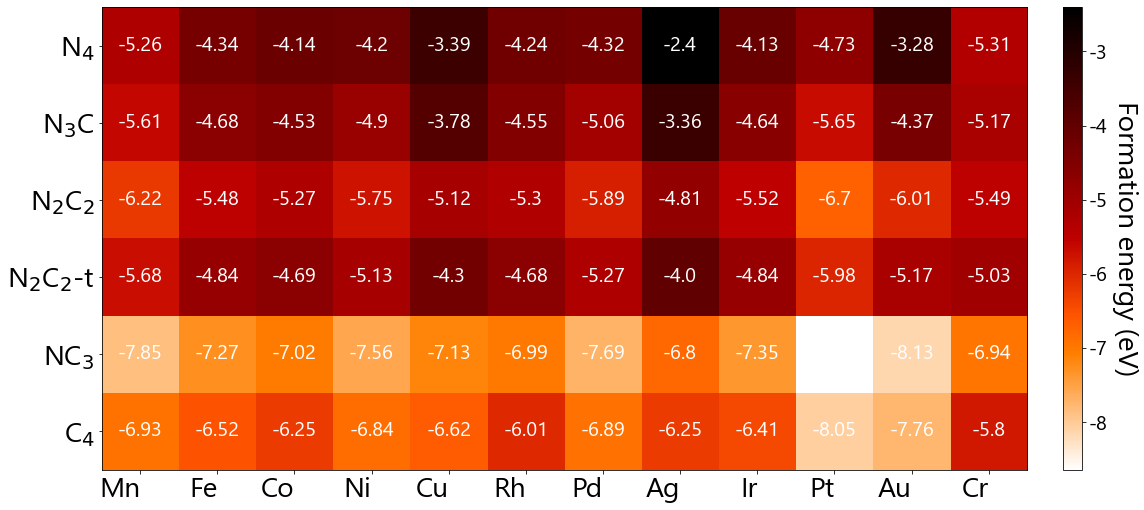

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,12)
prop5 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop6 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)

vegetables = ['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Rh', 'Pd', 'Ag', 'Ir', 'Pt', 'Au', 'Cr']
support = ["N$_{4}$", "N$_{3}$C","N$_{2}$C$_{2}$","N$_{2}$C$_{2}$-t","NC$_{3}$", "C$_{4}$"]

start=0
harvest=[]
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    temp=[]
    for j in range(start, len(temp_df['M'])+start) :
      temp.append(round(temp_df['for'][j],2))
      start=start+1
    harvest.append(temp)
print(harvest)
harvest =np.array(harvest)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.cm.gist_heat_r)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.5)
hi=plt.colorbar(im, cax=cax)
hi.ax.set_ylabel('Formation energy (eV)', rotation=-90, va="bottom", fontproperties=prop6)
hi.ax.set_yticklabels(np.arange(-8,-2, 1), fontproperties=prop5)
plot_conf = {'ha': 'center'}
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(vegetables)))
ax.set_yticks(np.arange(len(support)))
ax.set_yticklabels(support, fontproperties=prop6)
ax.set_xticklabels(vegetables, fontproperties=prop6,**plot_conf)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(support)):
    for j in range(len(vegetables)):
        text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="w", fontproperties=prop5) 

fig.tight_layout()
plt.savefig("form.png", dpi=150)

#Dissolution

[[1.44, 1.72, 1.79, 1.84, 2.03, 2.72, 3.11, 3.2, 2.54, 3.54, 2.59, 1.74], [1.62, 1.89, 1.99, 2.19, 2.23, 2.88, 3.48, 4.16, 2.71, 4.01, 2.96, 1.67], [1.92, 2.29, 2.35, 2.61, 2.9, 3.25, 3.9, 5.61, 3.0, 4.53, 3.5, 1.83], [1.65, 1.97, 2.07, 2.3, 2.49, 2.94, 3.58, 4.8, 2.77, 4.17, 3.22, 1.6], [2.74, 3.19, 3.23, 3.52, 3.9, 4.09, 4.8, 7.6, 3.61, 5.5, 4.21, 2.56], [2.27, 2.81, 2.84, 3.16, 3.65, 3.61, 4.39, 7.05, 3.3, 5.21, 4.09, 1.99]]


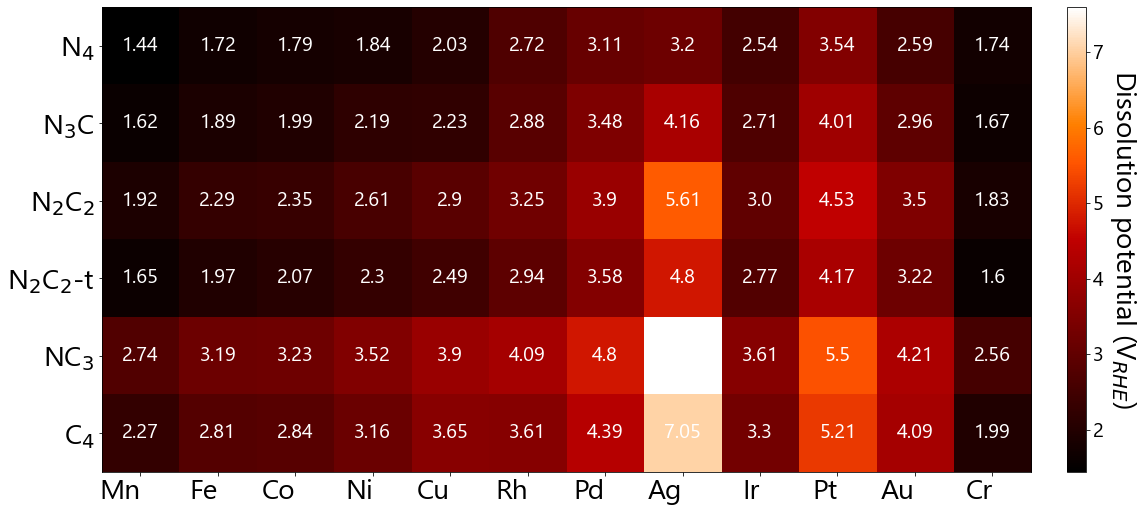

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["figure.figsize"] = (16,12)
prop5 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop6 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)

vegetables = ['Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Rh', 'Pd', 'Ag', 'Ir', 'Pt', 'Au', 'Cr']
support = ["N$_{4}$", "N$_{3}$C","N$_{2}$C$_{2}$","N$_{2}$C$_{2}$-t","NC$_{3}$", "C$_{4}$"]

start=0
harvest=[]
for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    temp=[]
    for j in range(start, len(temp_df['M'])+start) :
      temp.append(round(temp_df['diss'][j],2))
      start=start+1
    harvest.append(temp)
print(harvest)
harvest =np.array(harvest)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.cm.gist_heat)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.5)
hi=plt.colorbar(im, cax=cax)
hi.ax.set_ylabel('Dissolution potential (V$_{RHE}$)', rotation=-90, va="bottom", fontproperties=prop6)
hi.ax.set_yticklabels(np.arange(2,8, 1), fontproperties=prop5)
plot_conf = {'ha': 'center'}
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(vegetables)))
ax.set_yticks(np.arange(len(support)))
ax.set_yticklabels(support, fontproperties=prop6)
ax.set_xticklabels(vegetables, fontproperties=prop6,**plot_conf)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(support)):
    for j in range(len(vegetables)):
        text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="w", fontproperties=prop5) 

fig.tight_layout()
plt.savefig("diss.png", dpi=150)

In [34]:
cs= ['#EA466C','#E49E02','#02DAA2','#00b3fe','#0E8BB3','#120458']
labelss = ['N$_4$','N$_3$C','N$_2$C$_2$','N$_2$C$_2$-t','NC$_3$','C$_4$']

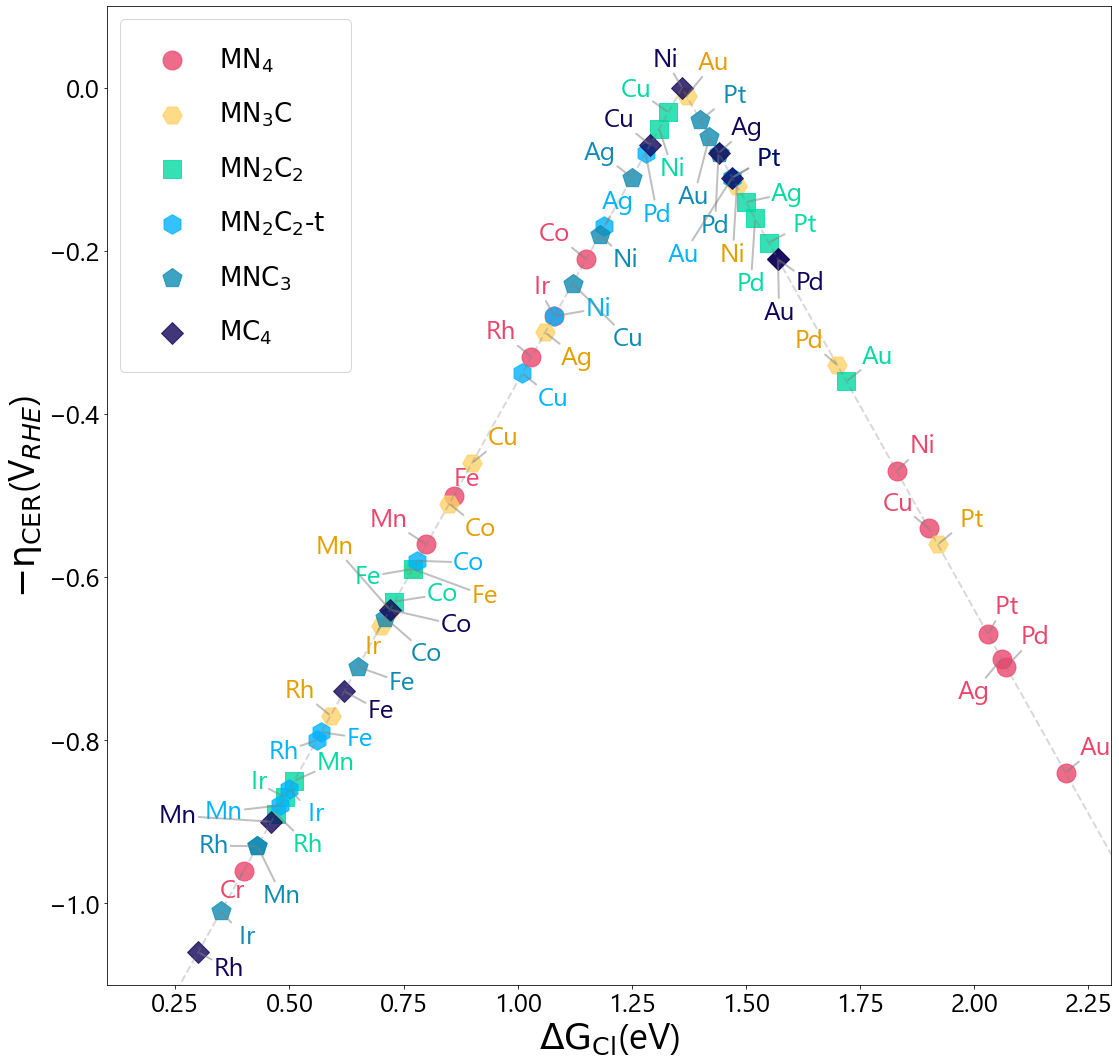

In [90]:
plt.figure(figsize=(18,18))
fs=26
fss=12
fsl=36
start = 0
TEXTS=[] 
plt.xlim(0.1,2.3)
plt.ylim(-1.1,0.1)
prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 0.6 for element in s]

for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    #print(temp_df['η_CER'])
    plt.scatter(temp_df['G_Cl'],-temp_df['η_CER'],
                s=s2[i], color=c[i],
                marker= sym[i], alpha=0.8,
                label=labels[i])
    
    for j in range(start, len(temp_df['M'])+start) :
        if -temp_df['η_CER'][j] >= -1.14 :
        #    TEXTS.append(plt.text(temp_df['G_Cl'][j], -temp_df['η_CER'][j], str(temp_df['M'][j]+labelss[i]), fontproperties=prop33,color=cs[i]))
            TEXTS.append(plt.text(temp_df['G_Cl'][j], -temp_df['η_CER'][j], str(temp_df['M'][j]), fontproperties=prop3,color=cs[i]))

            #plt.text(temp_df['G_Cl'][j]-0.0025,-temp_df['η_CER'][j]+0.01,
            #         temp_df['M'][j],fontsize = 16)
    start = start+12

adjust_text(TEXTS,expand_points=(2,2),arrowprops=dict(arrowstyle="-",color='gray',lw=2,alpha=0.5))    
#adjust_text(TEXTS,expand_points=(2,2),arrowprops=dict(arrowstyle="-",color='gray',lw=2,alpha=0.5,ls= 'dashed'))    

plt.plot(x,-y,color='gray',alpha=0.3, linestyle='--',linewidth=2)
plt.legend(loc='upper left', borderpad=1,labelspacing=1.0,prop={'family': font_name,'size':fs})

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)
plt.xlabel('$\mathrm{ΔG_{Cl}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{-η_{CER}}$'+'(V$_{RHE}$)', fontproperties=prop4)
plt.savefig("cer_all.png", dpi=150)

#OER 전체

In [36]:
df2

,#of N,M,G_Cl,G_OH,G_O,G_OOH,η_CER,η_OER,diss,for
0,4,Mn,0.80,0.59,1.64,3.56,0.56,1.36,1.44,-5.26
1,4,Fe,0.86,0.67,1.77,3.48,0.50,1.44,1.72,-4.34
2,4,Co,1.15,1.06,2.77,3.79,0.21,1.13,1.79,-4.14
3,4,Ni,1.83,1.93,4.05,4.51,0.47,1.59,1.84,-4.20
4,4,Cu,1.90,2.03,4.50,4.56,0.54,2.04,2.03,-3.39
...,...,...,...,...,...,...,...,...,...,...
67,0,Ag,1.44,0.90,1.34,3.61,0.08,1.31,7.05,-6.25
68,0,Ir,0.00,-0.06,0.42,2.80,1.36,2.12,3.30,-6.41
69,0,Pt,1.47,1.31,1.24,3.98,0.11,0.94,5.21,-8.05
70,0,Au,1.57,1.02,1.78,3.77,0.21,1.15,4.09,-7.76


In [39]:
df2['G_O']-df2['G_OH']

0     1.05
1     1.10
2     1.71
3     2.12
4     2.47
      ... 
67    0.44
68    0.48
69   -0.07
70    0.76
71    0.14
Length: 72, dtype: float64

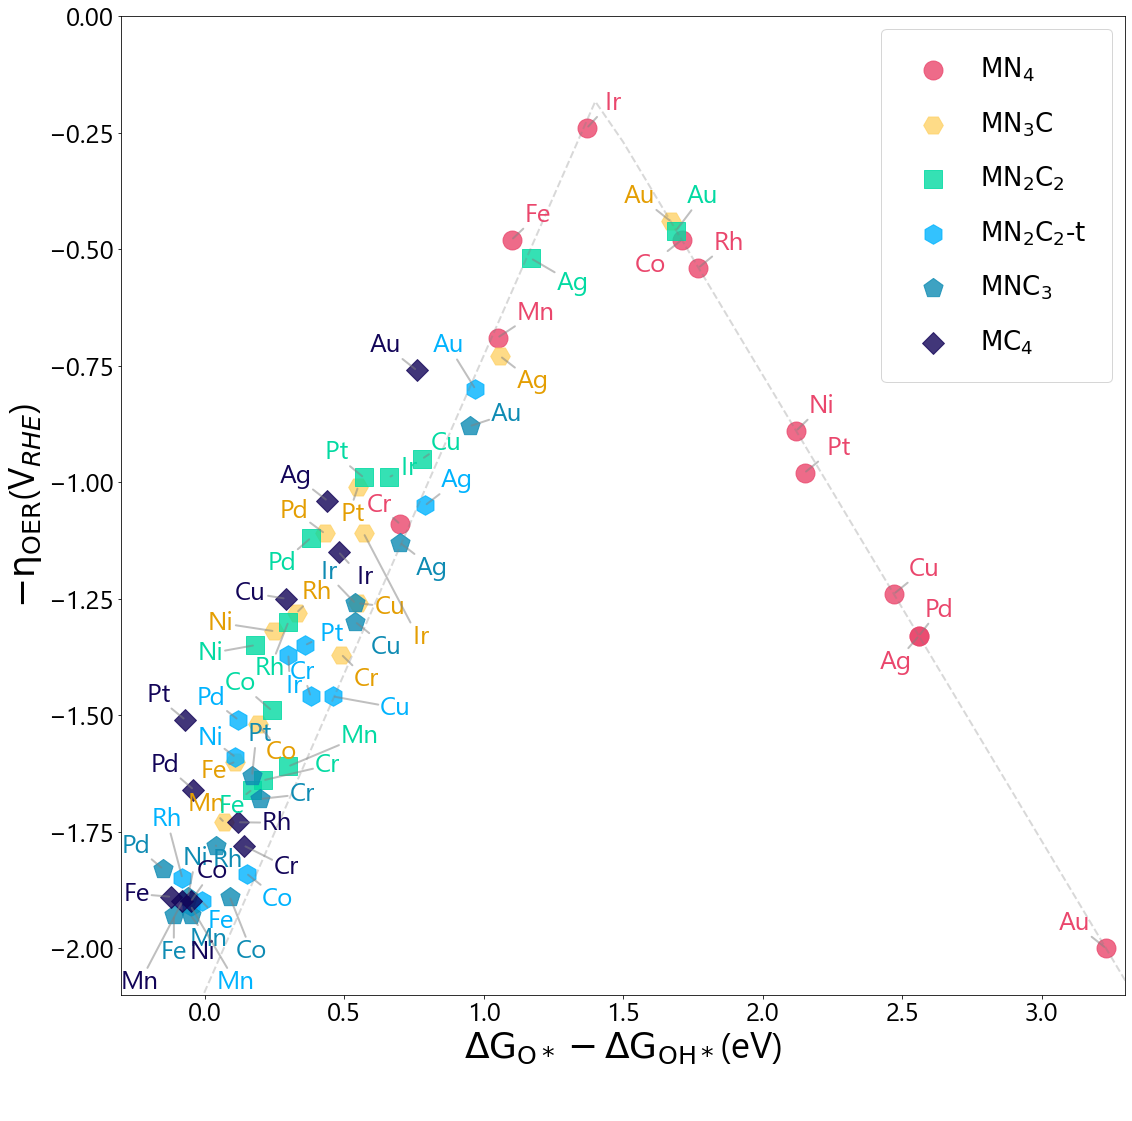

In [87]:
plt.figure(figsize=(18,18))
fs=26
fsl=36
start = 0
TEXTS=[] 
plt.xlim(-0.3,3.3)
plt.ylim(-2.1,0.0)
prop3 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fs)
prop4 = fm.FontProperties(fname='/content/font/segoeui.ttf',size=fsl)
font_name = fm.FontProperties(fname='/content/font/segoeui.ttf').get_name()

s2 = [element * 0.6 for element in s]

for i in range(len(num_N)) :
    
    is_N = df2['#of N'] == num_N[i]
    
    temp_df = df2[is_N]
    #print(temp_df['η_CER'])
    plt.scatter(temp_df['G_O']-temp_df['G_OH'],-temp_df['η_OER'],
                s=s2[i], color=c[i],
                marker= sym[i], alpha=0.8,
                label=labels[i])
    
    for j in range(start, len(temp_df['M'])+start) :
            TEXTS.append(plt.text(temp_df['G_O'][j]-temp_df['G_OH'][j], -temp_df['η_OER'][j], str(temp_df['M'][j]), fontproperties=prop3,color=cs[i]))

    start = start+12

adjust_text(TEXTS,expand_points=(2,2),arrowprops=dict(arrowstyle="-",color='gray',lw=2,alpha=0.5))    
#adjust_text(TEXTS,expand_points=(2,2),arrowprops=dict(arrowstyle="-",color='gray',lw=2,alpha=0.5,ls= 'dashed'))    

x_fit = np.arange(-.2,4,0.1)
y_OER_fit1 =  (-1.365*x_fit +0.864+2.460) - 1.23
#y_OER_fit1 = (2.63 - x_fit-1.23)
y_OER_fit2 = x_fit-1.23

η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
    # plot lines

plt.plot(x_fit , -η_OER_fit,'--', color='gray',alpha=0.3, linestyle='--',linewidth=2)
plt.legend(loc='upper right', borderpad=1,labelspacing=1,prop={'family': font_name,'size':fs})

plt.xticks( fontproperties=prop3)
plt.yticks(fontproperties=prop3)
plt.xlabel('$\mathrm{ΔG_{O*}-ΔG_{OH*}}$'+'(eV)', fontproperties=prop4)
plt.ylabel('$\mathrm{-η_{OER}}$'+'(V$_{RHE}$)', fontproperties=prop4)
plt.savefig("oer_all.png", dpi=150)